# **Facial Emotion Detection using Deep Learning and AI**

-----


## **Problem Definition**

**The context:**<br>

Deep Learning has found applications in many predictive tasks relating to more unstructured forms of data over the last few years, such as images, text, audio and video. Many of these tasks seem to be in the vein of a larger direction of predictive modeling that aims to match human-level performance. 

Understanding human emotions e.g. through facial expressions is therefore a critical component in many fields such as human-computer interaction, security, and understanding human psychology. Recent research has found that up to 55% of communication of sentiment occurs through facial expressions and other visual cues. By leveraging a specific branch of AI known as Emotion AI, and utilizing Deep Learning techniques, we can train machines to understand the emotional sentiment of individuals or groups through their facial expressions. This is a crucial step towards developing emotionally intelligent behavior in machines.

Achieving this technical milestone opens the door for numerous critical fields and industries where effectively handling human emotions can lead to extraordinary results. In this context, this Jupyter Notebook provides a step-by-step approach on building a facial emotion detection system from scratch, employing a simple CNN architecture, more complex ones, and transfer learning methods.


-----





**The objective:**<br>

The overall goal in this project is to develop a computer vision model using Deep Learning and Artificial Intelligence that can accurately detect facial emotions. Therefore the model should be able to perform multi-class classification on images of facial expressions, to classify the expressions according to the associated emotions (happy, sad, surprise, neutral).

------

**The key questions:**

In such a extensive project a lot of questions accure and maybe everybody has a different approach and different specializations. But by the end of the day we should have a clear understanding of:

- How do I handle my dataset and loading it in a structured way ?
- What are recent insights I can extract from EDA and Visualizing ?
- What preprocessing steps do I need to utilize before inputting the data in the DL-Model ?
- What architecture do I use for my CNNs and why ?
- Is there a way tu use Transfer Learning ? 
- How can I improve my models ?
- What are the outcomes and insights of the models and how can I interpret them ?

------

**The Problem formulation:**

Develop a deep learning-based facial emotion detection system that accurately identifies and classifies human emotions from facial images into predefined categories such as happiness, neutral, sadness and surprise. 

-------

## **About the dataset**

The data set consists of 3 folders, i.e., 'test', 'train', and 'validation'. 
Each of these folders has four subfolders:

**happy**: Images of people who have happy facial expressions.<br>
**sad**: Images of people with sad or upset facial expressions.<br>
**surprise**: Images of people who have shocked or surprised facial expressions.<br>
**neutral**: Images of people showing no prominent emotion in their facial expression at all.<br>

## **Mounting the Drive**

I dont use google colab here therefore I dont have to mount the drive. We use a anaconda jupyter notebook.

## **Importing the Libraries**

In [1]:
# Basic libraries for numerical operations and data manipulation
import numpy as np
import pandas as pd
import random

# Libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Libraries for handling file system and image data in our file system
import os
import cv2
from mtcnn import MTCNN
from sklearn.preprocessing import LabelBinarizer

# Libraries for loading and processing images
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from tensorflow.keras.preprocessing import image_dataset_from_directory
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping # Libraries for building and evaluating our used DL models 
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers

# Libraries for saving and loading models
from keras.models import load_model
import pickle

# Librarie for visualizations in the notebook
from IPython.core.display import display, HTML 
display(HTML("<style>.output_wrapper, .output {height:auto !important; max-height:10000px;}</style>")) # Set the display option to avoid scrolling in output

2024-06-05 07:56:58.567271: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/var/folders/jr/887rxn_n5nn1d9cjrnh9h7yh0000gn/T/ipykernel_1057/1708024795.py:37: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


## **Loading the Datasets**

In [2]:
data_dir = 'Facial_emotion_images'
subset_folders = ['train', 'validation', 'test']
facial_expressions = ['happy', 'neutral', 'sad', 'surprise']

train_data = []
val_data = []
test_data = []

def loading_datasets():
    for sf in subset_folders:
        path = os.path.join(data_dir, sf) #create a directory to the subset folder
        
        for category in facial_expressions:
            path_cat = os.path.join(path, category) #create a directory to the facial expressions folder
            category_class = category #set category
            
            for image in os.listdir(path_cat): # os.listdir(path_cat returns a list of the files in path_cat)
                image_array = cv2.imread(os.path.join(path_cat, image)) # extract the files as a numerical array
                
                # proof which list will be filled
                if sf == 'train':
                    train_data.append([image_array, category_class])
                
                if sf == 'validation':
                    val_data.append([image_array, category_class])
                    
                if sf == 'test':
                    test_data.append([image_array, category_class])
        
    return train_data, val_data, test_data
        
train_data, val_data, test_data = loading_datasets()

## **Explorative Data Analysis**

With our EDA we try to find answers to questions like:
- Are all face-images in the datasets consistent or do we have none-face images ?
- What is the shape of the datasets [train_data, val_data, test_data] ?
- Can we identify imbalances in the target variable -> facial expressions classes: [happy, neutral, sad, surprised] ?
- Can we find differences while plotting the distribution of the classes for each dataset ?
- Are there more EDA possibilities and could we find more insights ?

### Consistency of Facial Images

By just looking at the datasets on my Mac, I saw randomly placed non-facial images. While ideally, a dataset for facial expression classification should contain only images of faces, in practice, it is not uncommon to find some irrelevant or mislabeled images in a large dataset. Let us discuss how we will handle this situation and what approaches we could use to further improve our dataset. 

**Practical Considerations**
- In practical machine learning projects, having a small number of non-facial images in the dataset is usually not a significant problem if the model is robust and the overall dataset is dominated by facial-images. 

**Robustness of the Model:**
- A well-trained Convolutional Neural Network (CNN) for facial expression recognition is typically robust enough to handle a few irrelevant images. These models are designed to learn discriminative features of faces and can often ignore outliers.
- The impact of a small percentage of non-facial images is minimal, especially if the dataset is large and the majority of the images are correctly labeled.

**Evaluation of Model Performance:**
- The model's performance can be evaluated using standard metrics such as accuracy, precision, recall, and F1-score. If the evaluation metrics are satisfactory, it indicates that the presence of some non-facial images does not significantly affect the model's performance.

**Future Work and Recommendations**

Although a few non-facial images in the dataset might not be a critical issue, in bigger projects and more time we could also focus on improving the consistency of the dataset by filtering out non-relevant images more effectively. Here are some techniques that we could explore.

- **Automated Filtering:**
    - Use pre-trained models for face detection, such as MTCNN (Multi-task Cascaded Convolutional Networks) or OpenCV's Haar Cascades, to automatically detect and filter out non-facial images from the dataset.
    - Implementing a preprocessing step that removes images without detectable faces before training the model could enhance the overall quality of the dataset.

- **Data Augmentation and Cleaning:**
    - Data augmentation techniques can be used to increase the variety and quantity of facial images, thereby reducing the relative impact of any remaining non-facial images.
    - Manual review and cleaning of the dataset, although time-consuming, can ensure the highest quality and relevance of the training data
    
For our models and the fact that we dont see that much none-facial-images we will let the irrelevant pictures in our datasets and built our models based on that situation.

### Shape of our Datasets

In [52]:
datasets = [train_data, val_data, test_data]
dataset_names = ['Training Dataset', 'Validation Dataset', 'Test Dataset']

for ds_name, ds in zip(dataset_names, datasets):
    len_ds = len(ds)
    sample_image = ds[0][0]  # [image][label]
    dimension = sample_image.shape  # image dimensions

    print(f'{ds_name}:')
    print(f'{len_ds} images')
    print(f'For height, width and color-channels we find: {dimension}')
    print('-'*60)

Training Dataset:
15109 images
For height, width and color-channels we find: (48, 48, 3)
------------------------------------------------------------
Validation Dataset:
4977 images
For height, width and color-channels we find: (48, 48, 3)
------------------------------------------------------------
Test Dataset:
128 images
For height, width and color-channels we find: (48, 48, 3)
------------------------------------------------------------


### Visualizing our Classes

So after we load the dataset we will have a look at our pictures for each facial expression class. 
We will use our created dataset `train_data`. After visualizing we want to explaine what we see and what special characteristics and features we observe for each class.

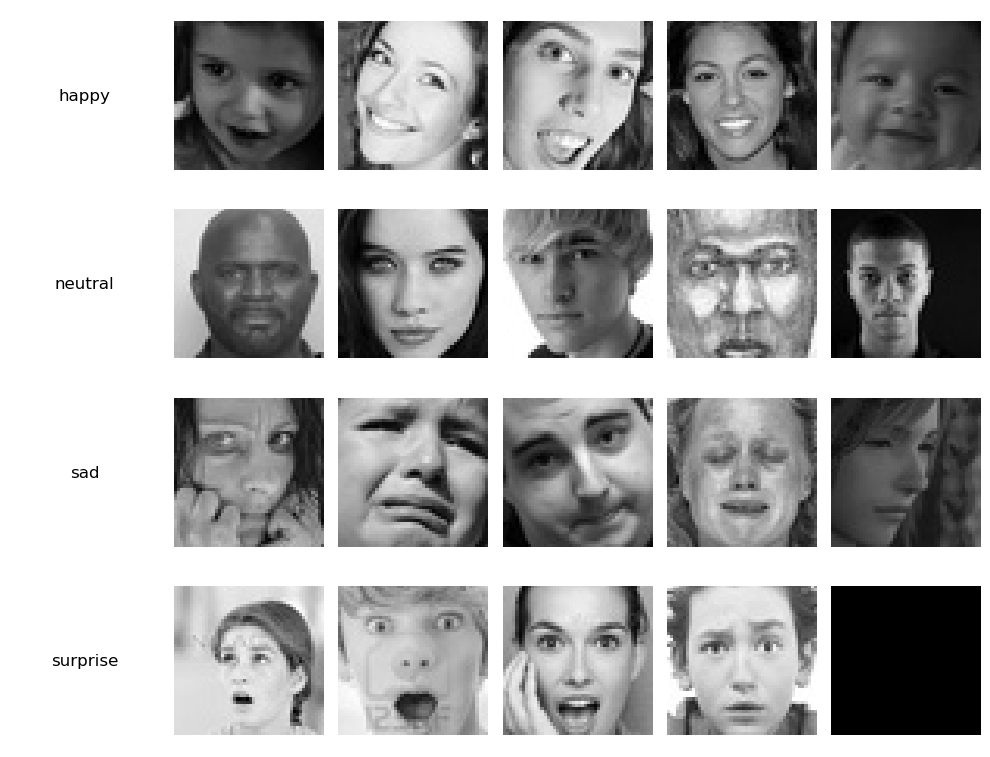

In [53]:
def visualize_and_save_categories(data, categories, num_images=5):
    # create figure
    fig, axes = plt.subplots(len(categories), num_images + 1, figsize=(10, 8)) # plt.subplots(row-counts, column.counts, figsize)
    
    for i, category in enumerate(categories):
        category_images = [img for img, label in data if label == category]
        selected_images = random.sample(category_images, num_images) # randomly choose five images out of category_images list
        
        # Set category label in the first column
        axes[i, 0].text(0.5, 0.5, category, fontsize=12, ha='center', va='center')
        axes[i, 0].axis('off')
        
        for j in range(num_images):
            axes[i, j + 1].imshow(cv2.cvtColor(selected_images[j], cv2.COLOR_BGR2RGB))
            axes[i, j + 1].axis('off')
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

visualize_and_save_categories(train_data, facial_expressions)

**Observations and Insights:**

Based on our visualization outputs, we can observe several unique features that distinguish each facial expression class from the others. In my personal view I have extracted the following observations and features:

**Happy:**
- Observations:
    - Wide, open mouth often showing teeth.
    - Raised cheeks.
    - Eyes are typically squinting or wide open, contributing to a smiling expression.
- Unique Features:
    - The presence of a wide, open mouth and visible teeth.
    - Elevated cheeks creating smile lines.
    - Bright, wide-open eyes or slightly squinted eyes.

**Neutral:**
- Observations:
    - Closed mouth with no distinct expression.
    - Relaxed facial muscles.
    - Eyes are usually in a natural, relaxed position without any significant squinting or widening.
- Unique Features:
    - Lack of pronounced facial muscle movement.
    - Neutral mouth position (neither upturned nor downturned).
    - Eyes in a neutral, relaxed state.

**Sad:**
- Observations:
    - Downturned corners of the mouth.
    - Eyes often appear to be slightly closed or teary.
    - Eyebrows may be drawn together or raised at the inner corners.
- Unique Features:
    - Downturned mouth creating a frown.
    - Slightly closed or teary eyes.
    - Raised or furrowed eyebrows.

**Surprise:**
- Observations:
    - Wide open eyes.
    - Raised eyebrows.
    - Mouth often open in an "O" shape.
- Unique Features:
    - Large, wide-open eyes.
    - Elevated and arched eyebrows.
    - Open mouth, often forming an "O" shape.

**Summary:**
- Happy: Wide open mouth, visible teeth, raised cheeks, bright or squinted eyes.
- Neutral: Closed mouth, relaxed facial muscles, natural eye position.
- Sad: Downturned mouth, slightly closed or teary eyes, raised or furrowed eyebrows.
- Surprise: Wide open eyes, raised eyebrows, open mouth in an "O" shape.

**Conclusion**:<br>
In my personal view the facial expression classes `suprise` and `happy` are very feature unique classes. Starting from this insight, I will expect that our model will learn the features of this classes very well. It should perform well in classifying these classes. Let's see what happens. 

### Imbalances in the Datasets

In [54]:
categories = ['happy', 'neutral', 'sad', 'surprise']

train_data_class_counts = Counter([label for _, label in train_data]) 
val_data_class_counts = Counter([label for _, label in val_data]) 
test_data_class_counts = Counter([label for _, label in test_data]) 

# We use a dataframe to get insights about the balance for each data set
data = {
    'Training Data': [train_data_class_counts[category] for category in categories],
    'Validation Data': [val_data_class_counts[category] for category in categories],
    'Test Data': [test_data_class_counts[category] for category in categories]
}

df = pd.DataFrame(data, index=categories)
df.head()

,Training Data,Validation Data,Test Data
happy,3976,1825,32
neutral,3978,1216,32
sad,3982,1139,32
surprise,3173,797,32


### Checking Distribuition of Classes by Visualizing

After a numerical view on the balance / distribution for each facial expression class on each dataset we will now visualize our results for clearer understanding and presentation

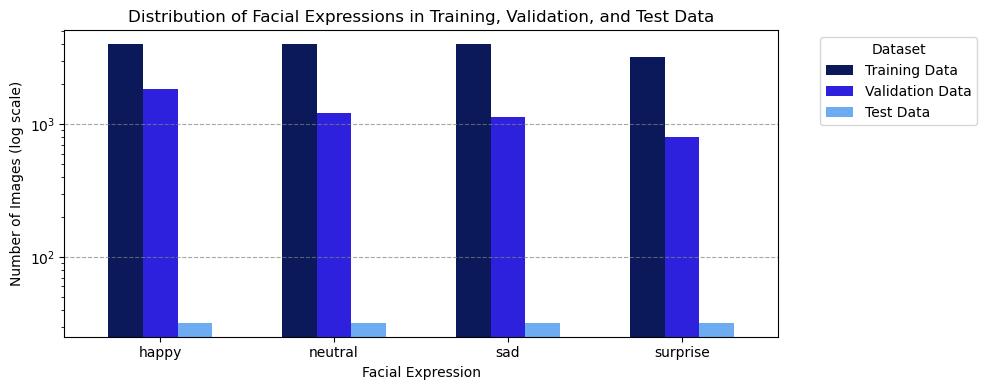

In [55]:
colors = ['#0b1859','#2e21de', '#6eacf2']

# Create the plot
ax = df.plot(kind='bar', figsize=(10, 4), width=0.6, color=colors)
ax.set_yscale('log')  # set log scale
ax.set_xlabel('Facial Expression')
ax.set_ylabel('Number of Images (log scale)')
ax.set_title('Distribution of Facial Expressions in Training, Validation, and Test Data')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7, color='grey')

# Legend
plt.legend(title='Dataset', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

**Observations and Insights:**

**Class Distribution:**
   - The distribution of images across the facial expression categories is not perfectly balanced.
   - In the Training Data, the counts are relatively high for all categories, with `Happy`, `Neutral`, and `Sad` having nearly equal representation. However, `Surprise` has noticeably fewer images.
   - The Validation Data shows a similar trend with `Surprise` having the fewest images.
   - The Test Data has a very small and uniform number of images (32) for each category.

**Imbalance Consideration:**
   - The imbalance in the `Surprise` category is quite noticeable, especially in the Training and Validation sets.
   - This imbalance might lead to biases in model training, where the model may perform better on the more represented categories (`Happy`, `Neutral`, `Sad`) compared to the less represented one (`Surprise`).
   - On the other hand we saw that the `surprise` class is very feature unique and it could be that this fact will stand against the situation that this class is underrepresented. 

**Exploratory Data Analysis (EDA):**
   - Analyzing the distribution of pixel values and other image characteristics across the categories could provide insights into potential preprocessing steps needed.
   - Investigating any correlations or patterns within the image data itself might reveal useful features for model training.

**Conclusion:**

The initial analysis indicates that while the dataset is generally well-distributed among most categories, the `Surprise` category is underrepresented. This imbalance could potentially affect the performance of models trained on this data. Therefore, it might be necessary to apply techniques such as data augmentation for the `Surprise` category or consider other methods to handle the class imbalance as we progress in developing the model.
But we saw that the facial expression class `happy`and `surprise`are both classes with very unique and distinguishable features. So we will first train our models to see if we need to do anything at all in the suprise class.


## **Creating our Data Loaders**

To get our model running, we need to utilize a few preprocessing steps to ensure our data is optimally presented to the models. Methods like data augmentation and normalization must be developed. Even though we observed an imbalance in the training and validation datasets, we first want to test if our models can handle this situation before implementing a solution for this problem. Sometimes, the underrepresented classes has distinct features that allow our models to perform well despite the imbalance.

Another `question` we should investigate is whether to use grayscale image data or RGB image data. For our model architecture, this will be different because grayscales work with one channel representations, while RGB is presented in three channels. I decided to follow both approaches to see how this may lead to different results in the model performance.

In [46]:
# Settings
path = 'Facial_emotion_images/'
data_subset = ['train', 'validation', 'test']
batch_size = 32
img_size = 48
color_mode = ['grayscale', 'rgb']

def data_augmentation():
    return ImageDataGenerator(horizontal_flip=True, brightness_range=(0.8, 1.2), rescale=1./255, shear_range=0.2)

def data_normalization():
    return ImageDataGenerator(rescale=1./255)

def data_loaders(data, path, data_subset, batch_size, img_size, color_mode, shuffle):
    return data.flow_from_directory(path + str(data_subset), target_size = (img_size, img_size), 
        color_mode = color_mode, batch_size = batch_size, class_mode ='categorical', shuffle=shuffle)
    
training_dataGenerator = data_augmentation() #augmentation & rescaling(normalization)
validation_dataGenerator = data_normalization() #rescaling(normalization)
testing_dataGenerator = data_normalization() #rescaling(normalization)


In [47]:
# Data loaders for grayscale
training_data_loader_gs = data_loaders(training_dataGenerator, path, 
                                       data_subset[0], batch_size, 
                                       img_size, color_mode[0], shuffle=True)

validation_data_loader_gs = data_loaders(validation_dataGenerator, path, 
                                       data_subset[1], batch_size, 
                                       img_size, color_mode[0], shuffle=False)

test_data_loader_gs = data_loaders(testing_dataGenerator, path, 
                                       data_subset[2], batch_size, 
                                       img_size, color_mode[0], shuffle=False)

Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


In [48]:
# Data loaders for RGB
training_data_loader_rgb = data_loaders(training_dataGenerator, path, 
                                       data_subset[0], batch_size, 
                                       img_size, color_mode[1], shuffle=True)

validation_data_loader_rgb = data_loaders(validation_dataGenerator, path, 
                                       data_subset[1], batch_size, 
                                       img_size, color_mode[1], shuffle=False)

test_data_loader_rgb = data_loaders(testing_dataGenerator, path, 
                                       data_subset[2], batch_size, 
                                       img_size, color_mode[1], shuffle=False)

Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


## **Model Building**

**ANNs versus CNNs:**

Before we build our models, we need to consider the specific model types we could use for detecting facial emotion expressions. While we could use standard artificial neural networks (ANNs), in practice, data scientists and machine learning engineers often prefer convolutional neural networks (CNNs) for tasks involving image data. To understand the reasons behind this preference, let's explore the advantages and disadvantages of each model type.

**Artificial Neural Networks (ANNs):**
- **Advantages:**
    - **Simplicity in its architecture**: ANNs are simpler to understand and implement compared to CNNs.

- **Disadvantages:**
    - **Lack of Translation Invariance:** ANNs are not inherently translation invariant. This means that they can struggle to recognize an object if it appears in different locations within an image. For instance, if we are trying to identify a specific object within an image, the ANN might focus on irrelevant areas where the object is not present, leading to incorrect predictions or classifications.
    - **Loss of Spatial Information:** ANNs typically require the image matrix to be converted into a flattened array before processing. This conversion causes the network to lose the spatial relationships between pixels, meaning it cannot leverage the fact that nearby pixels are more strongly related than distant ones. As a result, ANNs may perform poorly on tasks that require an understanding of spatial hierarchies and local patterns in the data, such as image recognition or classification.
    - **Inefficient Feature Detection:** ANNs can struggle to differentiate between important and unimportant features within an image. When detecting the presence of an object, ANNs may give equal importance to every pixel, including the background, which is often irrelevant for the classification task. This inefficiency can lead to the network learning unnecessary details about the background instead of focusing on the critical features of the object itself. This problem limits the effectiveness of traditional ANNs in image classification tasks where distinguishing between foreground and background features is crucial.
    - **Comnputational expensive:** ANNs are computational expensive.


**Convolutional Neural Networks (CNNs)**

- **Advantages:**
    - **Spatial Hierarchies:** CNNs are designed to capture spatial hierarchies and relationships within images through convolutional layers.
    - **Parameter Efficiency:** By sharing weights, CNNs drastically reduce the number of parameters needed compared to ANNs, making them more efficient and scalable.
    - **Local Connectivity:** Convolutional layers focus on local regions of the image, which helps in learning relevant features like edges, textures, and patterns.
    - **Robustness to Translation:** CNNs are more robust to translations and distortions in the input images due to their hierarchical feature learning.

- **Disadvantages:**
    - **Complexity:** CNNs are more complex to understand and implement compared to ANNs.
    - **Computational Requirements:** Although more efficient in terms of parameters, CNNs require significant computational resources, especially for deep architectures.

**My Conclusion:**<br>
Considering the nature of our task—detecting facial emotion expressions from images—CNNs offer significant advantages over ANNs. The ability of CNNs to capture spatial hierarchies, their parameter efficiency, and their robustness to translations and distortions make them particularly well-suited for image data. While ANNs may suffice for simpler tasks, the complexity and high-dimensionality of image data call for the specialized capabilities of CNNs.

We also need to think about the color representation. Do we use grayscale images color or rgb image color? To get a feeling about both and the different architecture we build a base model for both ones. 

### **Creating the Base Neuronal Network - Grayscale**

**Step by step**:

- **Creating a Sequential Model:** Models.Sequential(): This creates a sequential model that allows us to build a neural network layer by layer in a linear stack.
- **Add first Convolutional Layer:** Layers.Conv2D: This is a 2D convolutional layer with 32 filters, each having a kernel size of 3x3. It uses ReLU as the activation function. The input shape is specified as (img_size, img_size, 1) which corresponds to 48x48 grayscale images.
- **Add first MaxPooling Layer**: Layers.MaxPooling2D: This pooling layer reduces the spatial dimensions of the representation, helping to decrease the number of parameters and computation in the network. Here, a 2x2 pooling window is used.
- **Add second Convolutional Layer:** Layers.Conv2D: This is another 2D convolutional layer with 64 filters and a kernel size of 3x3, using ReLU activation.
- **Add second MaxPooling Layer:** Layers.MaxPooling2D: Another pooling layer with a 2x2 window to further reduce the spatial dimensions.
- **Add Flatten Layer:** Layers.Flatten: This layer flattens the input, converting the 2D matrix into a 1D vector to prepare it for the fully connected (dense) layers.
- **Add first Dense Layer:** Layers.Dense: This fully connected layer has 128 neurons with ReLU activation, which helps in learning complex representations from the flattened input.
- **Add Output Dense Layer:** Layers.Dense: The output layer with 4 neurons (corresponding to the 4 classes) and Softmax activation, which converts the outputs to probabilities for each class

In [87]:
# Setting random seeds
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

# Clear tf.keras backend
tf.keras.backend.clear_session()

#### Model Building

In [88]:
# Model architecture
def simple_model_gs():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 1)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(4, activation='softmax')) #we have 4 classes
    return model

simple_model_gs = simple_model_gs()

#### Compiling and Training the Model


In [89]:
# Hyperparameter
epochs = 20
learning_rate = 0.001

# Model compiling
simple_model_gs.compile(optimizer=optimizers.Adam(learning_rate=learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Model training
simple_model_gs_history = simple_model_gs.fit(training_data_loader_gs, 
                    epochs=epochs, 
                    validation_data=validation_data_loader_gs)

# Save the model in the current path
simple_model_gs.save('simple_model_gs.h5')

# Save the training history
with open('simple_model_gs_history.pkl', 'wb') as file:
    pickle.dump(simple_model_gs_history.history, file)

Epoch 1/20
473/473 [==============================] - 36s 73ms/step - loss: 1.1669 - accuracy: 0.4845 - val_loss: 1.0323 - val_accuracy: 0.5566
Epoch 2/20
473/473 [==============================] - 35s 73ms/step - loss: 0.9697 - accuracy: 0.5914 - val_loss: 0.9132 - val_accuracy: 0.6199
Epoch 3/20
473/473 [==============================] - 33s 69ms/step - loss: 0.8914 - accuracy: 0.6286 - val_loss: 0.8818 - val_accuracy: 0.6381
Epoch 4/20
473/473 [==============================] - 34s 71ms/step - loss: 0.8460 - accuracy: 0.6470 - val_loss: 0.8545 - val_accuracy: 0.6510
Epoch 5/20
473/473 [==============================] - 33s 70ms/step - loss: 0.7937 - accuracy: 0.6748 - val_loss: 0.8271 - val_accuracy: 0.6643
Epoch 6/20
473/473 [==============================] - 34s 71ms/step - loss: 0.7509 - accuracy: 0.6925 - val_loss: 0.8153 - val_accuracy: 0.6783
Epoch 7/20
473/473 [==============================] - 35s 73ms/step - loss: 0.7160 - accuracy: 0.7085 - val_loss: 0.7972 - val_accuracy:

/Users/philippgunther/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


#### Plot the Training and Validation Accuracies - / Loss

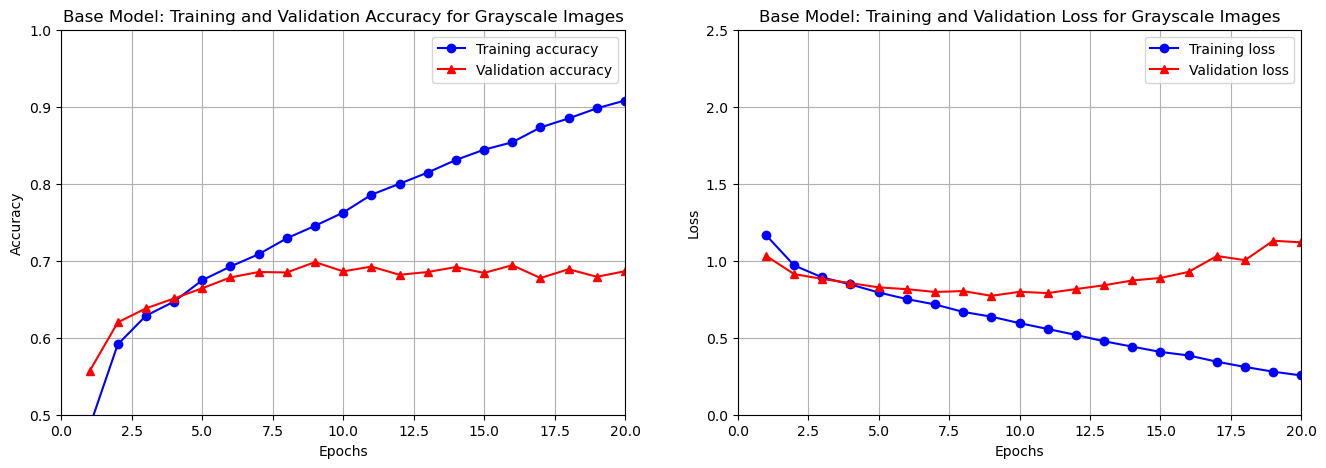

In [152]:
# Load the training history
with open('simple_model_gs_history.pkl', 'rb') as file:
    model_history = pickle.load(file)

# Plot the training history using the loaded history
def plot_training_history(history, y_lim_acc, y_lim_loss, x_lim):
    acc = history['accuracy']
    val_acc = history['val_accuracy']
    loss = history['loss']
    val_loss = history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(16, 5))

    # Plot training and validation accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo-', label='Training accuracy')
    plt.plot(epochs, val_acc, 'r^-', label='Validation accuracy')
    plt.title('Base Model: Training and Validation Accuracy for Grayscale Images')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.ylim(y_lim_acc)  # Set y-axis limits for accuracy
    plt.xlim(x_lim)  # Set x-axis limits
    plt.legend()
    plt.grid(True)

    # Plot training and validation loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo-', label='Training loss')
    plt.plot(epochs, val_loss, 'r^-', label='Validation loss')
    plt.title('Base Model: Training and Validation Loss for Grayscale Images')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.ylim(y_lim_loss)  # Set y-axis limits for loss
    plt.xlim(x_lim)  # Set x-axis limits
    plt.legend()
    plt.grid(True)

    plt.show()

# Use the loaded history to plot 
plot_training_history(model_history, y_lim_acc=(0.5, 1), y_lim_loss=(0, 2.5), x_lim=(0, 20))

#### Evaluating the Model on the Test Set

4/4 [==============================] - 0s 25ms/step - loss: 1.0101 - accuracy: 0.7031
Test Loss: 1.0101159811019897
Test Accuracy: 0.703125
4/4 [==============================] - 0s 18ms/step
Base Model: Classification Report for Grayscale Images
              precision    recall  f1-score   support

       happy       0.78      0.88      0.82        32
     neutral       0.61      0.59      0.60        32
         sad       0.56      0.59      0.58        32
    surprise       0.89      0.75      0.81        32

    accuracy                           0.70       128
   macro avg       0.71      0.70      0.70       128
weighted avg       0.71      0.70      0.70       128



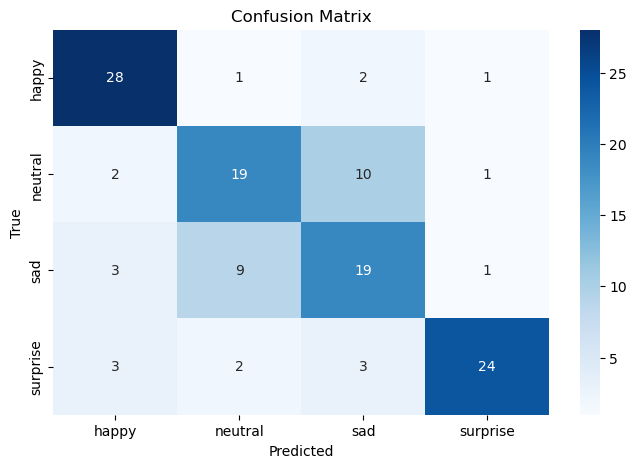

In [147]:
simple_model_gs = load_model('simple_model_gs.h5')

test_loss, test_accuracy = simple_model_gs.evaluate(test_data_loader_gs)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

Y_pred = simple_model_gs.predict(test_data_loader_gs)
y_pred = np.argmax(Y_pred, axis=1)

y_true = test_data_loader_gs.classes

print('Base Model: Classification Report for Grayscale Images')
print(classification_report(y_true, y_pred, target_names=test_data_loader_gs.class_indices.keys()))

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=test_data_loader_gs.class_indices.keys(), yticklabels=test_data_loader_gs.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### **Create the Base Neuronal Network - RGB**

In [93]:
# Setting random seeds
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

# Clear tf.keras backend
tf.keras.backend.clear_session()

#### Model Building

In [94]:
# Model architecture
def simple_model_gs():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3))) #set 3 channels
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(4, activation='softmax')) #we have 4 classes
    return model

simple_model_rgb = simple_model_gs()

#### Compiling and Training the Model with RGB

In [95]:
# Hyperparameter
epochs = 20
learning_rate = 0.001

# Model compiling
simple_model_rgb.compile(optimizer=optimizers.Adam(learning_rate=learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Model training
simple_model_rgb_history = simple_model_rgb.fit(training_data_loader_rgb, 
                    epochs=epochs, 
                    validation_data=validation_data_loader_rgb)

# Save the model in the current path
simple_model_rgb.save('simple_model_rgb.h5')

# Save the training history
with open('simple_model_rgb_history.pkl', 'wb') as file:
    pickle.dump(simple_model_rgb_history.history, file)

Epoch 1/20
473/473 [==============================] - 50s 103ms/step - loss: 1.1028 - accuracy: 0.5170 - val_loss: 0.9936 - val_accuracy: 0.5947
Epoch 2/20
473/473 [==============================] - 48s 101ms/step - loss: 0.9182 - accuracy: 0.6163 - val_loss: 0.8538 - val_accuracy: 0.6520
Epoch 3/20
473/473 [==============================] - 46s 97ms/step - loss: 0.8336 - accuracy: 0.6518 - val_loss: 0.8333 - val_accuracy: 0.6572
Epoch 4/20
473/473 [==============================] - 44s 93ms/step - loss: 0.7787 - accuracy: 0.6780 - val_loss: 0.7936 - val_accuracy: 0.6827
Epoch 5/20
473/473 [==============================] - 43s 91ms/step - loss: 0.7244 - accuracy: 0.7007 - val_loss: 0.7784 - val_accuracy: 0.6906
Epoch 6/20
473/473 [==============================] - 44s 92ms/step - loss: 0.6690 - accuracy: 0.7266 - val_loss: 0.7890 - val_accuracy: 0.6803
Epoch 7/20
473/473 [==============================] - 43s 90ms/step - loss: 0.6185 - accuracy: 0.7560 - val_loss: 0.7787 - val_accurac

/Users/philippgunther/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


#### Plot the Training and Validation Accuracies -/ Loss

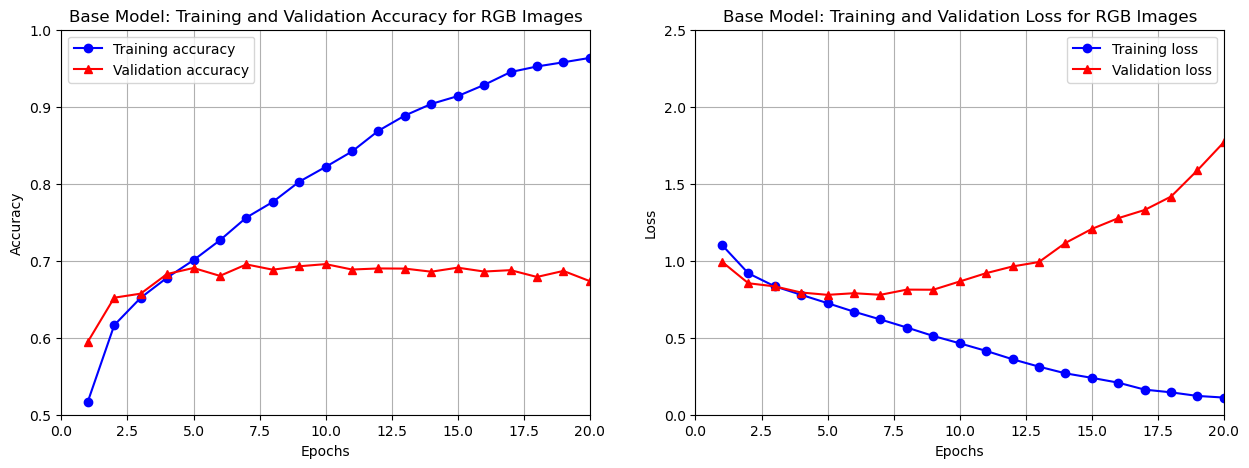

In [150]:
# Load the training history
with open('simple_model_rgb_history.pkl', 'rb') as file:
    model_history = pickle.load(file)

# Plot the training history using the loaded history
def plot_training_history(history, y_lim_acc, y_lim_loss, x_lim):
    acc = history['accuracy']
    val_acc = history['val_accuracy']
    loss = history['loss']
    val_loss = history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(15, 5))

    # Plot training and validation accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo-', label='Training accuracy')
    plt.plot(epochs, val_acc, 'r^-', label='Validation accuracy')
    plt.title('Base Model: Training and Validation Accuracy for RGB Images')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.ylim(y_lim_acc)  # Set y-axis limits for accuracy
    plt.xlim(x_lim)  # Set x-axis limits
    plt.legend()
    plt.grid(True)

    # Plot training and validation loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo-', label='Training loss')
    plt.plot(epochs, val_loss, 'r^-', label='Validation loss')
    plt.title('Base Model: Training and Validation Loss for RGB Images')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.ylim(y_lim_loss)  # Set y-axis limits for loss
    plt.xlim(x_lim)  # Set x-axis limits
    plt.legend()
    plt.grid(True)

    plt.show()

# Use the loaded history to plot
plot_training_history(model_history, y_lim_acc=(0.5, 1), y_lim_loss=(0, 2.5), x_lim=(0, 20))

#### Evaluating the Model on the Test Set

4/4 [==============================] - 0s 21ms/step - loss: 1.6729 - accuracy: 0.7188
Test Loss: 1.6729142665863037
Test Accuracy: 0.71875
4/4 [==============================] - 0s 19ms/step
Base Model: Classification Report for RGB Images
              precision    recall  f1-score   support

       happy       0.77      0.84      0.81        32
     neutral       0.74      0.53      0.62        32
         sad       0.54      0.66      0.59        32
    surprise       0.87      0.84      0.86        32

    accuracy                           0.72       128
   macro avg       0.73      0.72      0.72       128
weighted avg       0.73      0.72      0.72       128



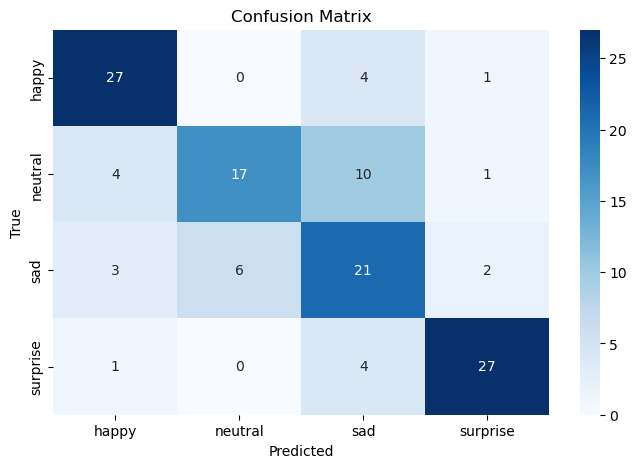

In [144]:
simple_model_rgb = load_model('simple_model_rgb.h5')


test_loss, test_accuracy = simple_model_rgb.evaluate(test_data_loader_rgb)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

Y_pred = simple_model_rgb.predict(test_data_loader_rgb)
y_pred = np.argmax(Y_pred, axis=1)

y_true = test_data_loader_rgb.classes

print('Base Model: Classification Report for RGB Images')
print(classification_report(y_true, y_pred, target_names=test_data_loader_rgb.class_indices.keys()))

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=test_data_loader_rgb.class_indices.keys(), yticklabels=test_data_loader_rgb.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

**Observations and Insights for our Base Model with Grayscale and RGB**

**Grayscale Architecture Observations**

**Training and Validation Accuracy and Loss:**
- **Training Accuracy:** The training accuracy steadily improves over the epochs, reaching around 0.9.
- **Validation Accuracy:** The validation accuracy improves initially but then plateaus and shows fluctuations around 0.7.
- **Training Loss:** The training loss decreases continuously, indicating that the model is learning from the training data.
- **Validation Loss:** The validation loss initially decreases but starts to increase after a few epochs.
- **Overfitting:** Both accuracy and loss metrics indicate strong overfitting since the performance on the validation set diverges from the performance on the training data.

**Classification Report and Confusion Matrix:**
- **Accuracy:** The overall accuracy is 0.70.
  - **Class-wise Performance:**
    - **Happy:** Precision 0.78, recall 0.88, F1-score 0.82.
    - **Neutral:** Precision 0.61, recall 0.59, F1-score 0.60.
    - **Sad:** Precision 0.56, recall 0.59, F1-score 0.58.
    - **Surprise:** Precision 0.89, recall 0.75, F1-score 0.81.
- **Confusion Matrix:** The matrix shows that the model often confuses 'neutral' and 'sad' classes but performs relatively well in distinguishing 'happy' and 'surprise' classes.

**RGB Architecture Observations**

**Training and Validation Accuracy and Loss:**
- **Training Accuracy:** The training accuracy improves over the epochs and reaches around 0.9, similar to the grayscale model.
- **Validation Accuracy:** The validation accuracy improves more steadily than in the grayscale model and reaches around 0.75.
- **Training Loss:** The training loss decreases continuously, indicating consistent learning.
- **Validation Loss:** The validation loss decreases initially but starts to increase after around 10 epochs.
- **Overfitting:** Both accuracy and loss metrics also indicate strong overfitting since the performance on the validation dataset diverges from the performance on the training dataset.

**Classification Report and Confusion Matrix:**
- **Accuracy:** The overall accuracy is 0.72, which is higher than the grayscale model.
  - **Class-wise Performance:**
    - **Happy:** Precision 0.77, recall 0.84, F1-score 0.81.
    - **Neutral:** Precision 0.74, recall 0.53, F1-score 0.62.
    - **Sad:** Precision 0.54, recall 0.66, F1-score 0.59.
    - **Surprise:** Precision 0.87, recall 0.84, F1-score 0.86.
- **Confusion Matrix:** The confusion matrix shows fewer misclassifications compared to the grayscale model, indicating better overall performance in distinguishing between different classes.

**Insights and Recommendations**

**Model Performance:**
- The RGB model outperforms the grayscale model, achieving higher accuracy and better class-wise performance.
- The RGB model shows a more stable validation accuracy and loss, indicating it generalizes better to unseen data.
- Both models exhibit strong overfitting, as evidenced by the divergence in performance between the training and validation datasets.

**Class Imbalance and Confusion:**
- The models struggle with the 'neutral' and 'sad' classes, indicating that these emotions might have more subtle differences that are harder to capture.
- The 'surprise' class is consistently the easiest to classify, likely due to more distinct features.

**Recommendations:**
- To improve the overfitting situation, consider building a slightly more complex model using more convolutional blocks, batch normalization, and dropout layers.


### **Creating a second more complex Convolutional Neuronal Network**

Since we saw that our performance led to better results by using RGB models, we will continue using RGB for the building of our next models. In both simple CNNs, we observed significant overfitting. Therefore, we will now use batch normalization and dropout layers to address overfitting in the model. We will also incorporate more convolutional layers, or more precisely, convolutional blocks.

**Batch Normalization:**
- What it is: A technique to normalize the inputs of each layer in the network.
    - Benefits:
        - Stabilizes and accelerates training.
        - Reduces the sensitivity to the initial starting weights.
        - Allows for higher learning rates.
        - Provides a slight regularization effect, reducing the need for other regularization techniques.

**Dropout:**
- What it is: A regularization technique where randomly selected neurons are ignored during training.
    - Benefits:
        - Prevents overfitting by ensuring the network does not rely too heavily on any individual neurons.
        - Forces the network to learn redundant and more robust representations.
        - Reduces interdependent learning among neurons, encouraging the network to be more resilient to noise in the training data.

By incorporating batch normalization and dropout, along with additional convolutional blocks, we aim to improve the model's generalization performance and mitigate overfitting

In [113]:
# Setting random seeds
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

# Clear tf.keras backend
tf.keras.backend.clear_session()

#### Model Building

In [114]:
def improved_model_rgb():
    model = models.Sequential()
    
    # First Convolutional Block
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(img_size, img_size, 3)))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.25))
    
    # Second Convolutional Block
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.25))
    
    # Third Convolutional Block
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.25))
    
    
    # Fully Connected Layers
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.25))
    model.add(layers.Dense(4, activation='softmax'))  #4 classes for classification
    
    return model

improved_model_rgb = improved_model_rgb()

#### Compiling and Training the Model

In [115]:
# Hyperparameter
epochs = 20
learning_rate = 0.001

# Model compiling
improved_model_rgb.compile(optimizer=optimizers.Adam(learning_rate=learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Model training
improved_model_rgb_history = improved_model_rgb.fit(training_data_loader_rgb, 
                    epochs=epochs, 
                    validation_data=validation_data_loader_rgb)

# Save the model in the current path
improved_model_rgb.save('improved_model_rgb.h5')

# Save the training history
with open('improved_model_rgb_history.pkl', 'wb') as file:
    pickle.dump(improved_model_rgb_history.history, file)

Epoch 1/20
473/473 [==============================] - 148s 306ms/step - loss: 1.2637 - accuracy: 0.4859 - val_loss: 1.0943 - val_accuracy: 0.5337
Epoch 2/20
473/473 [==============================] - 144s 305ms/step - loss: 0.9487 - accuracy: 0.6004 - val_loss: 0.9496 - val_accuracy: 0.6128
Epoch 3/20
473/473 [==============================] - 144s 305ms/step - loss: 0.8582 - accuracy: 0.6381 - val_loss: 0.8873 - val_accuracy: 0.6140
Epoch 4/20
473/473 [==============================] - 145s 307ms/step - loss: 0.7934 - accuracy: 0.6701 - val_loss: 2.4410 - val_accuracy: 0.3695
Epoch 5/20
473/473 [==============================] - 145s 306ms/step - loss: 0.7688 - accuracy: 0.6778 - val_loss: 1.0968 - val_accuracy: 0.6305
Epoch 6/20
473/473 [==============================] - 145s 306ms/step - loss: 0.7222 - accuracy: 0.7034 - val_loss: 0.8295 - val_accuracy: 0.6677
Epoch 7/20
473/473 [==============================] - 144s 304ms/step - loss: 0.7034 - accuracy: 0.7119 - val_loss: 0.6700 -

#### Plot the Training and Validation Accuracies -/ Loss

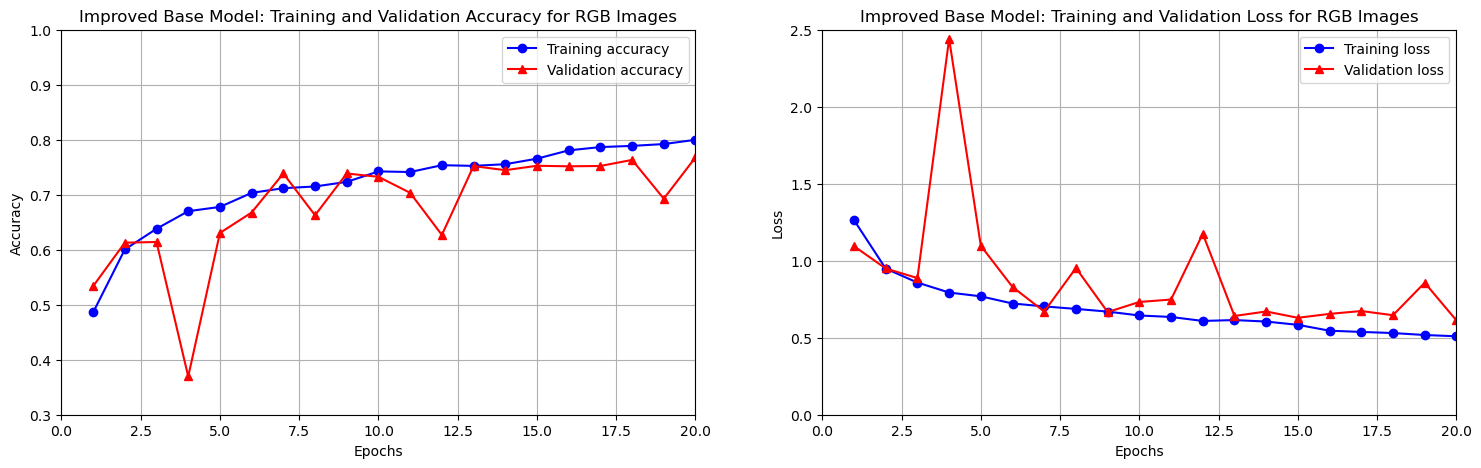

In [155]:
# Load the training history
with open('improved_model_rgb_history.pkl', 'rb') as file:
    model_history = pickle.load(file)

# Plot the training history using the loaded history
def plot_training_history(history, y_lim_acc, y_lim_loss, x_lim):
    acc = history['accuracy']
    val_acc = history['val_accuracy']
    loss = history['loss']
    val_loss = history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(18, 5))

    # Plot training and validation accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo-', label='Training accuracy')
    plt.plot(epochs, val_acc, 'r^-', label='Validation accuracy')
    plt.title('Improved Base Model: Training and Validation Accuracy for RGB Images')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.ylim(y_lim_acc)  # Set y-axis limits for accuracy
    plt.xlim(x_lim)  # Set x-axis limits
    plt.legend()
    plt.grid(True)

    # Plot training and validation loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo-', label='Training loss')
    plt.plot(epochs, val_loss, 'r^-', label='Validation loss')
    plt.title('Improved Base Model: Training and Validation Loss for RGB Images')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.ylim(y_lim_loss)  # Set y-axis limits for loss
    plt.xlim(x_lim)  # Set x-axis limits
    plt.legend()
    plt.grid(True)

    plt.show()

# Use the loaded history to plot
plot_training_history(model_history, y_lim_acc=(0.3, 1), y_lim_loss=(0, 2.5), x_lim=(0, 20))

#### Evaluating the Model on the Test Set

4/4 [==============================] - 1s 69ms/step - loss: 0.5154 - accuracy: 0.8047
Test Loss: 0.5153622627258301
Test Accuracy: 0.8046875
4/4 [==============================] - 0s 63ms/step
Improved Base Model: Classification Report
              precision    recall  f1-score   support

       happy       0.93      0.88      0.90        32
     neutral       0.62      0.78      0.69        32
         sad       0.74      0.62      0.68        32
    surprise       0.97      0.94      0.95        32

    accuracy                           0.80       128
   macro avg       0.82      0.80      0.81       128
weighted avg       0.82      0.80      0.81       128



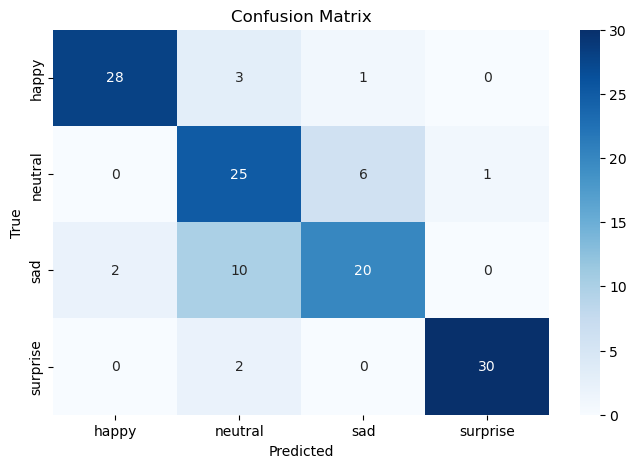

In [156]:
improved_model_rgb = load_model('improved_model_rgb.h5')

test_loss, test_accuracy = improved_model_rgb.evaluate(test_data_loader_rgb)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

Y_pred = improved_model_rgb.predict(test_data_loader_rgb)
y_pred = np.argmax(Y_pred, axis=1)

y_true = test_data_loader_rgb.classes

print('Improved Base Model: Classification Report')
print(classification_report(y_true, y_pred, target_names=test_data_loader_rgb.class_indices.keys()))

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=test_data_loader_rgb.class_indices.keys(), yticklabels=test_data_loader_rgb.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

**Observations and Insights**

**Training and Validation Accuracy and Loss:**
- **Training Accuracy:** The training accuracy steadily improves over the epochs and approaches 0.8.
- **Validation Accuracy:** The validation accuracy also improves and shows an overall stable trend, reaching around 0.75 by the end of the training.
- **Training Loss:** The training loss decreases consistently, indicating effective learning from the training data.
- **Validation Loss:** The validation loss decreases initially but shows some fluctuations. Despite these fluctuations, it remains lower compared to the initial epochs, indicating improved generalization.

**Classification Report and Confusion Matrix:**
- **Overall Accuracy:** The overall accuracy of the model is 0.80, which is a significant improvement over the simpler models.
- **Class-wise Performance:**
  - **Happy:** High precision (0.93), recall (0.88), and F1-score (0.90). The model performs very well on this class.
  - **Neutral:** Precision is lower (0.62), but recall is higher (0.78), resulting in an F1-score of 0.69. The model is better at identifying neutral instances compared to previous models.
  - **Sad:** Moderate performance with a precision of 0.74 and recall of 0.62, leading to an F1-score of 0.68. This class still poses some challenges for the model.
  - **Surprise:** Excellent performance with high precision (0.97), recall (0.94), and F1-score (0.95), indicating that the model distinguishes surprise very well.
- **Confusion Matrix:** 
  - **Happy:** Most instances of 'happy' are correctly classified, with few misclassifications.
  - **Neutral:** Some instances of 'neutral' are misclassified as 'sad', but the overall performance is better.
  - **Sad:** There is still confusion between 'sad' and 'neutral', but the number of correctly classified 'sad' instances has increased.
  - **Surprise:** Almost all instances of 'surprise' are correctly classified, with minimal misclassification.

**Improvement Over Simple Models:**
- The complex model shows a notable improvement in overall accuracy (0.80) compared to the simpler models. This is evident in both the accuracy metrics and the classification report.
- The addition of more convolutional layers, batch normalization, and dropout has helped in better capturing the features and reducing overfitting.

**Batch Normalization and Dropout Effectiveness:**
- The use of batch normalization and dropout has contributed to more stable training and validation accuracy, as well as lower validation loss. This indicates that these techniques have been effective in combating overfitting and improving generalization.

**Class-specific Performance:**
- The model performs exceptionally well on the 'happy' and 'surprise' classes, which might be due to more distinct and consistent features associated with these emotions.
- The 'neutral' and 'sad' classes still present some challenges, likely due to the subtle differences between these emotions, leading to occasional misclassifications.

**Potential Areas for Further Improvement:**
- **Data Augmentation:** Further augmenting the training data could help in improving the performance on the 'neutral' and 'sad' classes by providing more varied examples.
- **Class Balancing:** Ensuring balanced representation of each class during training might help improve recall for the 'sad' class.
- **Model Fine-tuning:** Fine-tuning the model hyperparameters, such as learning rate, batch size, and the dropout rate, could yield further improvements.

**Conclusion**
The complex CNN model with batch normalization and dropout has significantly improved the performance over the simpler models, achieving higher overall accuracy and better class-wise performance. The model generalizes well, as seen in the stable validation accuracy and loss trends. Further refinements, especially focusing on the challenging classes, could lead to even better performance.


## Think About It

**Performance:**
- Our first two base models did not show satisfactory performance. We saw bad accuracy metrics and in the classification report we saw bad performing classes such as `sad` and `neutral`. 
- Our more complex model performed way better and combated overfitting by the use of batch normalization and dropouts. The overall accuracy improved and our precision, recall and f-1 scores also improved. We saw a really good performance in the classes `happy` and `suprise` and also a improving performance on the classes `sad` and `neutral`. 
- Is it satisfactory: For the classes `happy` and `suprise` I would go for it. Bit for `sad` and `neutral`, we need to improve our performance. Maybe in finding more characteristic images for sad and neutral expressions or in a more advanced data-augmentation for these two classes. This could be a approach for some next models.


**Color Mode:**<br>
For my architecture the rgb models worked better. In my view this could be the reasons:
- RGB images contain three color channels (Red, Green, and Blue), providing more detailed information compared to grayscale images, which only have one channel. This additional information can be critical for capturing subtle differences in facial expressions that are not just based on intensity but also on color variations.
- RGB images are closer to how humans perceive the world, and certain facial expressions might involve subtle color changes (e.g., redness in the face due to blushing or stress) that can be significant for accurate classification
- Modern deep learning models, especially Convolutional Neural Networks (CNNs), are designed to handle and extract features from multi-channel images. These models can leverage the extra information in RGB channels to improve feature extraction and classification performance


## **Transfer Learning Architectures**

In this section, we will create several Transfer Learning Architectures. For the pre-trained models, we will select three popular architectures: VGG16, ResNet V2, and EfficientNet. We will deploy these models and evaluate the results to see if we can improve our results from our base and improved CNNs.

### **Creating our Data Loaders for Transfer Learning Architectures**

In this section, we are creating data loaders that will be used as inputs to our Transfer Learning Models. We will set `color_mode = 'rgb'` as this is the required format for the Transfer Learning Architectures. In section 1.7, we already created data loaders for RGB models, so we will reuse them here.

In [5]:
# Settings
path = 'Facial_emotion_images/'
data_subset = ['train', 'validation', 'test']
batch_size = 32
img_size = 48
color_mode = ['grayscale', 'rgb']

def data_augmentation():
    return ImageDataGenerator(horizontal_flip=True, brightness_range=(0.8, 1.2), rescale=1./255, shear_range=0.2)

def data_normalization():
    return ImageDataGenerator(rescale=1./255)

def data_loaders(data, path, data_subset, batch_size, img_size, color_mode, shuffle):
    return data.flow_from_directory(path + str(data_subset), target_size = (img_size, img_size), 
        color_mode = color_mode, batch_size = batch_size, class_mode ='categorical', shuffle=shuffle)
    
training_dataGenerator = data_augmentation() #augmentation & rescaling(normalization)
validation_dataGenerator = data_normalization() #rescaling(normalization)
testing_dataGenerator = data_normalization() #rescaling(normalization)


In [4]:
# Data loaders for RGB
training_data_loader_rgb = data_loaders(training_dataGenerator, path, 
                                       data_subset[0], batch_size, 
                                       img_size, color_mode[1], shuffle=True)

validation_data_loader_rgb = data_loaders(validation_dataGenerator, path, 
                                       data_subset[1], batch_size, 
                                       img_size, color_mode[1], shuffle=False)

test_data_loader_rgb = data_loaders(testing_dataGenerator, path, 
                                       data_subset[2], batch_size, 
                                       img_size, color_mode[1], shuffle=False)

Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


### **VGG16 Model**

**Short description:**<br>
The VGG 16 model, developed by the Visual Geometry Group at Oxford, is a deep convolutional neural network with 16 layers. It is known for its simplicity and uniform architecture, consisting of 13 convolutional layers followed by 3 fully connected layers. The model uses small 3x3 convolution filters and is effective for image classification tasks, achieving top results in various image recognition benchmarks.

In [137]:
# Setting random seeds
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

# Clear tf.keras backend
tf.keras.backend.clear_session()

#### Model Building


In [138]:
base_model = VGG16(include_top = False, weights = 'imagenet', input_shape = (img_size, img_size, 3))

# Freeze the convolutional base to retain pre-trained weights
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Convert features to a single vector per image
x = Dense(512, activation='relu')(x)  # Fully connected layer with 512 units
x = Dropout(0.25)(x)  # Dropout layer for regularization
predictions = Dense(4, activation='softmax')(x)  # Output layer for 10 classes

# Define the model with the base model input and new output layers
vgg_16_model = Model(inputs=base_model.input, outputs=predictions)

#### Compiling and Training the VGG16 Model

In [139]:
# Hyperparameter
epochs = 20
learning_rate = 0.001

vgg_16_model.compile(optimizer=Adam(learning_rate=learning_rate), 
                     loss='categorical_crossentropy', metrics=['accuracy'])

history_vgg_16 = vgg_16_model.fit(
    training_data_loader_rgb, epochs=epochs, validation_data=validation_data_loader_rgb
)

# Save the model in the current path
vgg_16_model.save('vgg16_model.h5')

# Save the training history
with open('vgg16_history.pkl', 'wb') as file:
    pickle.dump(history_vgg_16.history, file)

Epoch 1/20
473/473 [==============================] - 156s 327ms/step - loss: 1.1628 - accuracy: 0.4846 - val_loss: 1.0962 - val_accuracy: 0.5264
Epoch 2/20
473/473 [==============================] - 157s 332ms/step - loss: 1.0795 - accuracy: 0.5308 - val_loss: 1.0861 - val_accuracy: 0.5284
Epoch 3/20
473/473 [==============================] - 171s 361ms/step - loss: 1.0560 - accuracy: 0.5424 - val_loss: 1.0360 - val_accuracy: 0.5519
Epoch 4/20
473/473 [==============================] - 188s 398ms/step - loss: 1.0362 - accuracy: 0.5539 - val_loss: 1.0619 - val_accuracy: 0.5387
Epoch 5/20
473/473 [==============================] - 188s 398ms/step - loss: 1.0160 - accuracy: 0.5655 - val_loss: 1.0556 - val_accuracy: 0.5455
Epoch 6/20
473/473 [==============================] - 188s 398ms/step - loss: 0.9982 - accuracy: 0.5770 - val_loss: 1.0349 - val_accuracy: 0.5556
Epoch 7/20
473/473 [==============================] - 159s 336ms/step - loss: 0.9819 - accuracy: 0.5840 - val_loss: 1.0207 -

/Users/philippgunther/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


#### Plot the Training and Validation Accuracies -/ Loss

This time I built a function for plotting

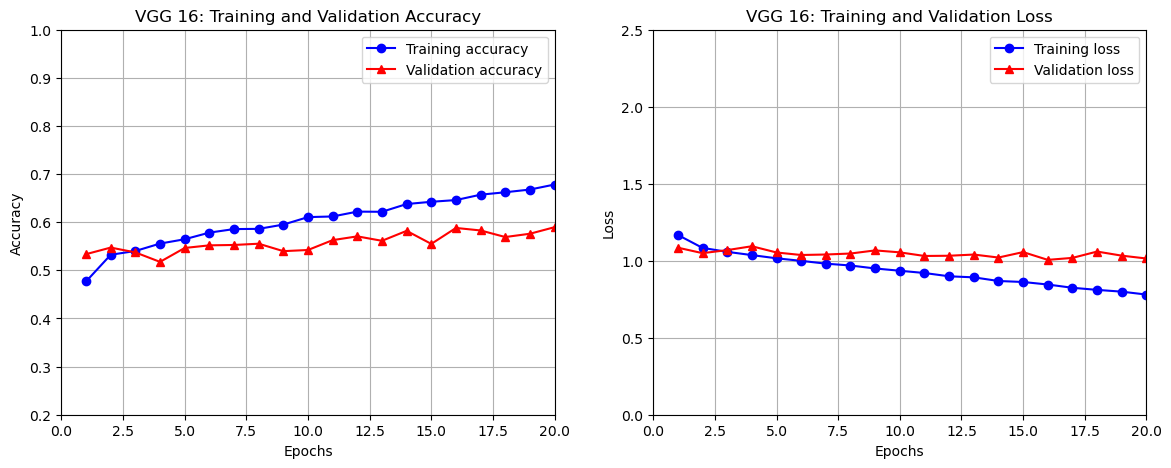

In [158]:
# Load the training history
with open('history_vgg_16.pkl', 'rb') as file:
    model_history = pickle.load(file)

def plot_training_history(history, y_lim_acc, y_lim_loss, x_lim):
    acc = history['accuracy']
    val_acc = history['val_accuracy']
    loss = history['loss']
    val_loss = history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(14, 5))

    # Plot training and validation accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo-', label='Training accuracy')
    plt.plot(epochs, val_acc, 'r^-', label='Validation accuracy')
    plt.title('VGG 16: Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.ylim(y_lim_acc)  # Set y-axis limits for accuracy
    plt.xlim(x_lim)  # Set x-axis limits
    plt.legend()
    plt.grid(True)

    # Plot training and validation loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo-', label='Training loss')
    plt.plot(epochs, val_loss, 'r^-', label='Validation loss')
    plt.title('VGG 16: Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.ylim(y_lim_loss)  # Set y-axis limits for loss
    plt.xlim(x_lim)  # Set x-axis limits
    plt.legend()
    plt.grid(True)

    plt.show()

# Use the loaded history to plot with improved visualization
plot_training_history(model_history, y_lim_acc=(0.2, 1), y_lim_loss=(0, 2.5), x_lim=(0, 20))

#### Evaluating the VGG16 Model on the Test Set

4/4 [==============================] - 1s 261ms/step - loss: 1.0691 - accuracy: 0.5938
Test Loss: 1.069135069847107
Test Accuracy: 0.59375
4/4 [==============================] - 1s 226ms/step
VGG 16: Classification Report
              precision    recall  f1-score   support

       happy       0.58      0.56      0.57        32
     neutral       0.50      0.59      0.54        32
         sad       0.57      0.38      0.45        32
    surprise       0.71      0.84      0.77        32

    accuracy                           0.59       128
   macro avg       0.59      0.59      0.58       128
weighted avg       0.59      0.59      0.58       128



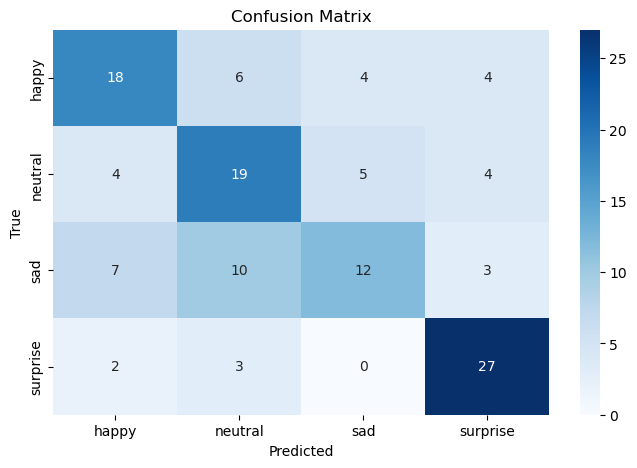

In [159]:
vgg_16_model = load_model('vgg16_model.h5')

test_loss, test_accuracy = vgg_16_model.evaluate(test_data_loader_rgb)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

Y_pred = vgg_16_model.predict(test_data_loader_rgb)
y_pred = np.argmax(Y_pred, axis=1)

y_true = test_data_loader_rgb.classes

print('VGG 16: Classification Report')
print(classification_report(y_true, y_pred, target_names=test_data_loader_rgb.class_indices.keys()))

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=test_data_loader_rgb.class_indices.keys(), yticklabels=test_data_loader_rgb.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

**Observations, Insights and Thinking:**

**Training and Validation Accuracy -/ Loss**:
- **Training accuracy:** The overall accuracy of the model on the test set is 0.59, indicating that it correctly classifies 59% of the test samples
- **Training accuracy:** The training accuracy shows a gradual and steady increase over the epochs, reaching approximately 0.65 by the end of the training period
- **Validation accuracy**: The validation accuracy, on the other hand, shows a more erratic behavior, fluctuating around 0.55-0.60 with no clear upward trend. It does not surpass 0.60 at any point
- **Training loss**:The training loss decreases steadily, indicating that the model is learning and improving its predictions on the training data
- **Validation loss**:The validation loss remains relatively constant around 1.0, showing slight fluctuations but no significant decrease.

**Both accuracy and loss are showing slight overfitting since the training results diverge from validation results.**

**Classification Report**:

- The model shows the highest performance in the "surprise" category, with a precision of 0.71, recall of 0.84, and an F1-score of 0.77.
- The "sad" category has the lowest recall (0.38) and F1-score (0.45), indicating that the model struggles the most with correctly identifying sad expressions.
- Precision for the other classes (happy and neutral) ranges between 0.50 and 0.58, with corresponding F1-scores between 0.54 and 0.57, showing moderate performance.


**Confusion Matrix**:

- The confusion matrix reveals the number of correct and incorrect predictions for each class.
- For "happy," the model correctly classifies 18 out of 32 instances, but it often misclassifies happy expressions as neutral (6 instances) or sad (4 instances).
- The model has a reasonable performance in predicting "neutral" expressions, with 19 correct out of 32, but it also confuses them with happy and sad expressions.
- "Sad" expressions are the most challenging for the model, with only 12 out of 32 correctly identified. Misclassifications are spread across all other classes.
- "Surprise" expressions are the most accurately predicted, with 27 out of 32 correctly classified, though there are some confusions with happy and neutral expressions.

**Conclusion**<br>
The model demonstrates moderate performance in classifying facial expressions into happy, neutral, sad, and surprise categories. The training accuracy and loss trends indicate that the model learns well from the training data, but the relatively constant validation loss and fluctuating validation accuracy suggest overfitting

**Why does this model performs not as good as maybe suggested?**
The pre-trained model uses the ImageNet dataset, which contains millions of images from a wide variety of categories, `not just facial images`. This likely explains why our model does not perform as well in classifying facial expressions. The pre-trained model is not specifically trained for this task, leading to suboptimal performance in distinguishing between different facial expressions

### **RestNet V2 Model**

**Short description:**<br>
ResNet V2 (Residual Networks Version 2) is an advanced variant of the original ResNet architecture, which introduced residual learning to address the vanishing gradient problem in deep networks. ResNet V2 incorporates batch normalization before the activation functions (pre-activation) and improved skip connections, allowing for the training of very deep networks, such as those with 50, 101, or even more layers. This model excels in tasks requiring deep feature extraction and has set records in image classification and object detection

In [164]:
# Setting random seeds
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

# Clear tf.keras backend
tf.keras.backend.clear_session()

#### Model Building

In [165]:
# Load the ResNet50V2 model with pre-trained ImageNet weights, excluding the top layer
base_model = ResNet50V2(include_top=False, weights='imagenet', input_shape=(img_size, img_size, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.25)(x)
predictions = Dense(4, activation='softmax')(x)  # Output layer for 4 classes

# Define the model
resnet_model = Model(inputs=base_model.input, outputs=predictions)

94668760/94668760 [==============================] - 5s 0us/step


#### Compiling and Training the ResNet V2 Model

In [168]:
# Hyperparameters
epochs = 20
learning_rate = 0.001

resnet_model.compile(optimizer=Adam(learning_rate=learning_rate), 
                     loss='categorical_crossentropy', metrics=['accuracy'])

history_resnet = resnet_model.fit(
    training_data_loader_rgb, 
    epochs=epochs, 
    validation_data=validation_data_loader_rgb
)

# Save the model
resnet_model.save('resnet50v2_model.h5')

# Save the training history
with open('resnet50v2_history.pkl', 'wb') as file:
    pickle.dump(history_resnet.history, file)

Epoch 1/20
473/473 [==============================] - 97s 196ms/step - loss: 1.3248 - accuracy: 0.4618 - val_loss: 1.1366 - val_accuracy: 0.5105
Epoch 2/20
473/473 [==============================] - 91s 193ms/step - loss: 1.1006 - accuracy: 0.5245 - val_loss: 1.1231 - val_accuracy: 0.5182
Epoch 3/20
473/473 [==============================] - 92s 193ms/step - loss: 1.0582 - accuracy: 0.5446 - val_loss: 1.0615 - val_accuracy: 0.5491
Epoch 4/20
473/473 [==============================] - 95s 201ms/step - loss: 1.0228 - accuracy: 0.5686 - val_loss: 1.1224 - val_accuracy: 0.5190
Epoch 5/20
473/473 [==============================] - 94s 199ms/step - loss: 0.9936 - accuracy: 0.5783 - val_loss: 1.0589 - val_accuracy: 0.5523
Epoch 6/20
473/473 [==============================] - 94s 199ms/step - loss: 0.9616 - accuracy: 0.5983 - val_loss: 1.0656 - val_accuracy: 0.5552
Epoch 7/20
473/473 [==============================] - 93s 196ms/step - loss: 0.9382 - accuracy: 0.6107 - val_loss: 1.1008 - val_ac

/Users/philippgunther/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


#### Plot the Training and Validation Accuracies- / Loss

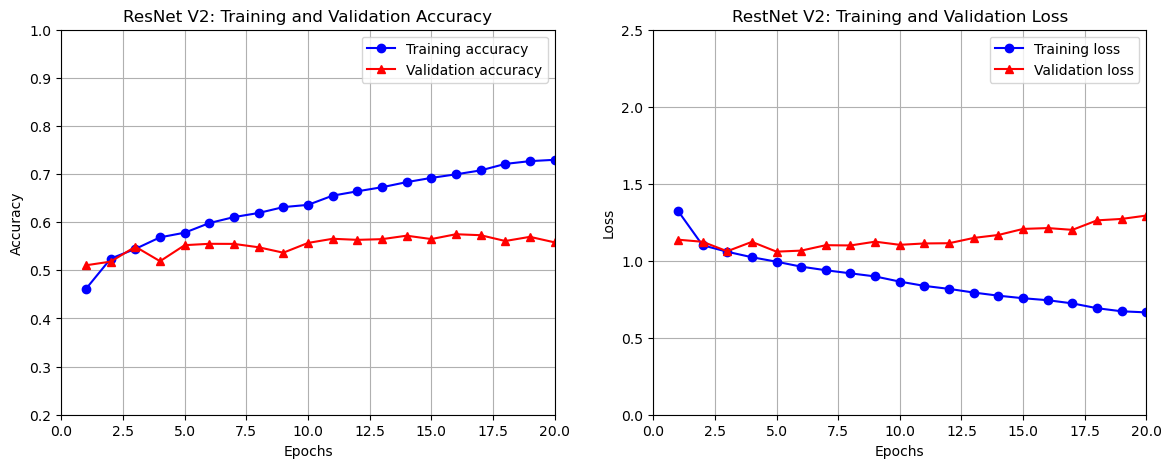

In [169]:
# Load the training history
with open('resnet50v2_history.pkl', 'rb') as file:
    model_history = pickle.load(file)

def plot_training_history(history, y_lim_acc, y_lim_loss, x_lim):
    acc = history['accuracy']
    val_acc = history['val_accuracy']
    loss = history['loss']
    val_loss = history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(14, 5))

    # Plot training and validation accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo-', label='Training accuracy')
    plt.plot(epochs, val_acc, 'r^-', label='Validation accuracy')
    plt.title('ResNet V2: Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.ylim(y_lim_acc)  # Set y-axis limits for accuracy
    plt.xlim(x_lim)  # Set x-axis limits
    plt.legend()
    plt.grid(True)

    # Plot training and validation loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo-', label='Training loss')
    plt.plot(epochs, val_loss, 'r^-', label='Validation loss')
    plt.title('RestNet V2: Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.ylim(y_lim_loss)  # Set y-axis limits for loss
    plt.xlim(x_lim)  # Set x-axis limits
    plt.legend()
    plt.grid(True)

    plt.show()

# Plot the training history
plot_training_history(model_history, y_lim_acc=(0.2, 1), y_lim_loss=(0, 2.5), x_lim=(0, 20))

#### Evaluating the ResNet V2 Model on the Test Set

4/4 [==============================] - 2s 155ms/step - loss: 1.2591 - accuracy: 0.5859
Test Loss: 1.2590819597244263
Test Accuracy: 0.5859375
4/4 [==============================] - 2s 139ms/step
ResNet V2: Classification Report
              precision    recall  f1-score   support

       happy       0.58      0.59      0.58        32
     neutral       0.45      0.47      0.46        32
         sad       0.55      0.50      0.52        32
    surprise       0.76      0.78      0.77        32

    accuracy                           0.59       128
   macro avg       0.58      0.59      0.58       128
weighted avg       0.58      0.59      0.58       128



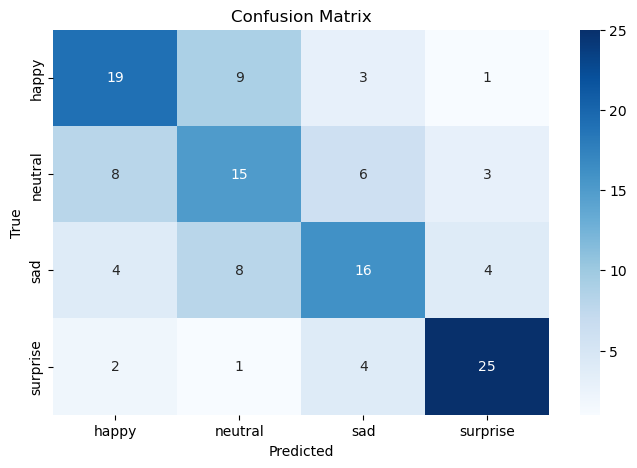

In [170]:
# Load the trained model
resnet_model = load_model('resnet50v2_model.h5')

# Evaluate the model on the test data
test_loss, test_accuracy = resnet_model.evaluate(test_data_loader_rgb)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

# Predict the labels for the test data
Y_pred = resnet_model.predict(test_data_loader_rgb)
y_pred = np.argmax(Y_pred, axis=1)

# Get true labels
y_true = test_data_loader_rgb.classes

# Print classification report
print('ResNet V2: Classification Report')
print(classification_report(y_true, y_pred, target_names=test_data_loader_rgb.class_indices.keys()))

# Plot confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=test_data_loader_rgb.class_indices.keys(), 
            yticklabels=test_data_loader_rgb.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


**Observations, Insights and Thinking:**

The ResNet V2 Model is showing similar results in comparison to the VGG16 model. Here too, I think that this is based on the same reason as for the results on VGG 16 model. So, ResNet V2 is also trained on imagenet data and this dataset doesn't fit for our specific facial expression classification task.

### **Efficient Net Model**

**Short description:**<br>
EfficientNet is a family of convolutional neural networks that optimize both accuracy and efficiency by scaling the network width, depth, and resolution systematically. Developed by Google AI, EfficientNet models are designed using a compound scaling method, achieving better performance with fewer parameters and computational resources compared to traditional models. EfficientNet models are highly effective for a variety of image classification and transfer learning tasks

**For the Efficient Net Model I also used Finetuning to see if we can accelerate our performance**.

In [11]:
# Setting random seeds
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

# Clear tf.keras backend
tf.keras.backend.clear_session()

#### Model Building

In [12]:
base_model = EfficientNetB0(include_top=False, weights='imagenet', input_shape=(img_size, img_size, 3))

for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.25)(x)
predictions = Dense(4, activation='softmax')(x)  

efficientnet_model = Model(inputs=base_model.input, outputs=predictions)

#### Compiling and Training the Efficient Net Model

In [13]:
initial_epochs = 20
learning_rate = 0.001

efficientnet_model.compile(optimizer=Adam(learning_rate=learning_rate), 
                           loss='categorical_crossentropy', metrics=['accuracy'])

history_efficientnet_initial = efficientnet_model.fit(
    training_data_loader_rgb, 
    epochs=initial_epochs, 
    validation_data=validation_data_loader_rgb
)

Epoch 1/20
473/473 [==============================] - 73s 139ms/step - loss: 1.3962 - accuracy: 0.2544 - val_loss: 1.3832 - val_accuracy: 0.2289
Epoch 2/20
473/473 [==============================] - 64s 134ms/step - loss: 1.3830 - accuracy: 0.2625 - val_loss: 1.3737 - val_accuracy: 0.2443
Epoch 3/20
473/473 [==============================] - 61s 129ms/step - loss: 1.3821 - accuracy: 0.2592 - val_loss: 1.3710 - val_accuracy: 0.2289
Epoch 4/20
473/473 [==============================] - 63s 134ms/step - loss: 1.3820 - accuracy: 0.2570 - val_loss: 1.3711 - val_accuracy: 0.2443
Epoch 5/20
473/473 [==============================] - 62s 131ms/step - loss: 1.3820 - accuracy: 0.2643 - val_loss: 1.3701 - val_accuracy: 0.3667
Epoch 6/20
473/473 [==============================] - 62s 130ms/step - loss: 1.3820 - accuracy: 0.2641 - val_loss: 1.3717 - val_accuracy: 0.2443
Epoch 7/20
473/473 [==============================] - 62s 132ms/step - loss: 1.3820 - accuracy: 0.2587 - val_loss: 1.3710 - val_ac

#### Fine Tuning the Model

In [14]:
for layer in base_model.layers[-20:]:  
    layer.trainable = True

fine_tune_epochs = 10
fine_tune_learning_rate = 0.00001
total_epochs = initial_epochs + fine_tune_epochs

efficientnet_model.compile(optimizer=Adam(learning_rate=fine_tune_learning_rate), 
                           loss='categorical_crossentropy', metrics=['accuracy'])


history_efficientnet_fine_tune = efficientnet_model.fit(
    training_data_loader_rgb, 
    epochs=total_epochs, 
    validation_data=validation_data_loader_rgb, 
    initial_epoch=initial_epochs
)


efficientnet_model.save('efficientnetb0_fine_tuned_model.h5')

history = history_efficientnet_initial.history
for key in history_efficientnet_fine_tune.history.keys():
    history[key].extend(history_efficientnet_fine_tune.history[key])

with open('efficientnetb0_history.pkl', 'wb') as file:
    pickle.dump(history, file)

Epoch 21/30
473/473 [==============================] - 84s 159ms/step - loss: 1.4512 - accuracy: 0.2602 - val_loss: 1.3672 - val_accuracy: 0.3601
Epoch 22/30
473/473 [==============================] - 71s 150ms/step - loss: 1.4050 - accuracy: 0.2636 - val_loss: 1.3622 - val_accuracy: 0.3667
Epoch 23/30
473/473 [==============================] - 71s 149ms/step - loss: 1.3959 - accuracy: 0.2698 - val_loss: 1.3620 - val_accuracy: 0.3667
Epoch 24/30
473/473 [==============================] - 70s 148ms/step - loss: 1.3925 - accuracy: 0.2614 - val_loss: 1.3630 - val_accuracy: 0.3667
Epoch 25/30
473/473 [==============================] - 70s 148ms/step - loss: 1.3895 - accuracy: 0.2620 - val_loss: 1.3609 - val_accuracy: 0.3667
Epoch 26/30
473/473 [==============================] - 71s 150ms/step - loss: 1.3883 - accuracy: 0.2669 - val_loss: 1.3640 - val_accuracy: 0.3667
Epoch 27/30
473/473 [==============================] - 71s 150ms/step - loss: 1.3870 - accuracy: 0.2612 - val_loss: 1.3648 -

/Users/philippgunther/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


#### Plot the Training and Validation Accuracies -/ Loss

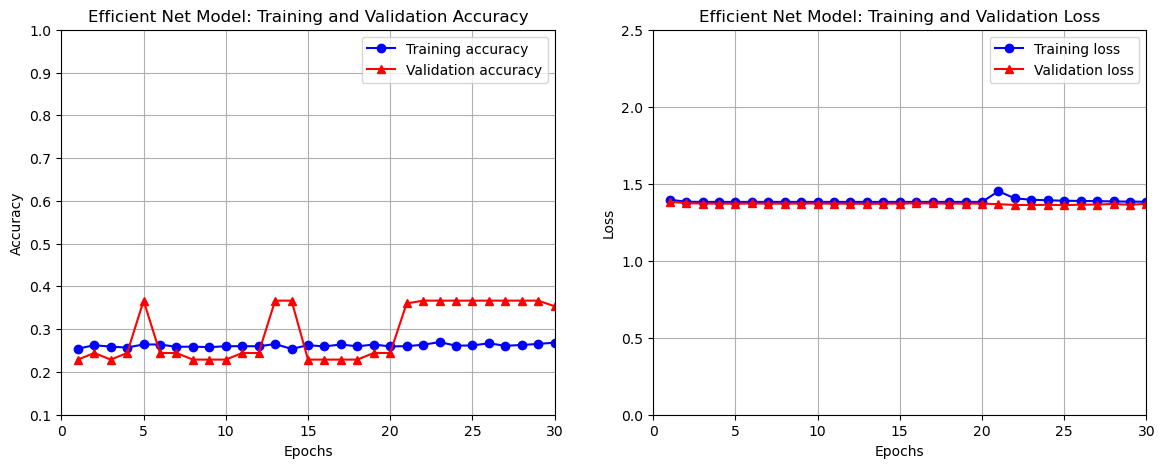

In [6]:
# Load the training history
with open('efficientnetb0_history.pkl', 'rb') as file:
    model_history = pickle.load(file)

def plot_training_history(history, y_lim_acc, y_lim_loss, x_lim):
    acc = history['accuracy']
    val_acc = history['val_accuracy']
    loss = history['loss']
    val_loss = history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(14, 5))

    # Plot training and validation accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo-', label='Training accuracy')
    plt.plot(epochs, val_acc, 'r^-', label='Validation accuracy')
    plt.title('Efficient Net Model: Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.ylim(y_lim_acc)  # Set y-axis limits for accuracy
    plt.xlim(x_lim)  # Set x-axis limits
    plt.legend()
    plt.grid(True)

    # Plot training and validation loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo-', label='Training loss')
    plt.plot(epochs, val_loss, 'r^-', label='Validation loss')
    plt.title('Efficient Net Model: Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.ylim(y_lim_loss)  # Set y-axis limits for loss
    plt.xlim(x_lim)  # Set x-axis limits
    plt.legend()
    plt.grid(True)

    plt.show()

# Plot the training history
plot_training_history(model_history, y_lim_acc=(0.1, 1), y_lim_loss=(0, 2.5), x_lim=(0, 30))


#### Evaluating the Efficient Net Model on the Test-Set

4/4 [==============================] - 3s 99ms/step - loss: 1.3861 - accuracy: 0.2500
Test Loss: 1.3861136436462402
Test Accuracy: 0.25
4/4 [==============================] - 2s 97ms/step
Classification Report
              precision    recall  f1-score   support

       happy       0.26      0.91      0.41        32
     neutral       0.18      0.09      0.12        32
         sad       0.00      0.00      0.00        32
    surprise       0.00      0.00      0.00        32

    accuracy                           0.25       128
   macro avg       0.11      0.25      0.13       128
weighted avg       0.11      0.25      0.13       128



/Users/philippgunther/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/philippgunther/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/philippgunther/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


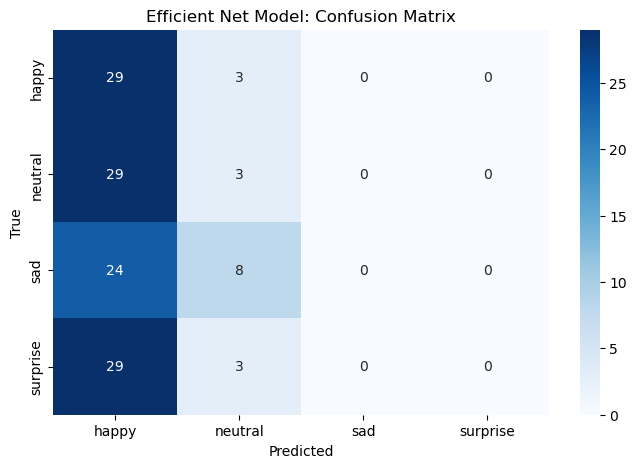

In [7]:
# Load the trained model
efficientnet_model = load_model('efficientnetb0_fine_tuned_model.h5')

# Evaluate the model on the test data
test_loss, test_accuracy = efficientnet_model.evaluate(test_data_loader_rgb)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

# Predict the labels for the test data
Y_pred = efficientnet_model.predict(test_data_loader_rgb)
y_pred = np.argmax(Y_pred, axis=1)

# Get true labels
y_true = test_data_loader_rgb.classes

# Print classification report
print('Classification Report')
print(classification_report(y_true, y_pred, target_names=test_data_loader_rgb.class_indices.keys()))

# Plot confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=test_data_loader_rgb.class_indices.keys(), 
            yticklabels=test_data_loader_rgb.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Efficient Net Model: Confusion Matrix')
plt.show()


**Observations, Insights and Thinking:**

By looking at the performance results of the EfficientNet model, it is evident that it doesn't work well for this task. To be honest, the results are quite unexpected, and I would not recommend using such a model for this task. The overall accuracy has dropped to 25%. In the confusion matrix, we see that it primarily tries to predict the 'happy' and 'neutral' classes, with poor results. Even some fine-tuning didn't improve the situation.

Of course, we could try to improve the model by adjusting different hyperparameters, such as the learning rate, and exploring ways to increase accuracy, precision, recall, and F1 score. However, for now, we will leave these results as they are and focus on other models for this project.

### **Overall Performance and Conclusions for the Transfer Learning Models**

Using transfer learning is an efficient approach to building models for specific tasks and problems without the need for developing new architectures from scratch and incurring high training expenses in terms of time, IT infrastructure, and research. However, these models must be suitable for our specific problem statement.

As we can observe from the performance of models like VGG 16, ResNet V2, and EfficientNet, the overall performance is not satisfactory for practical use. None of these models are able to achieve an accuracy above 60%, and the detailed class-specific results also reflect poor performance

Additionally, here's a more detailed observation for each model:

- **ResNet V2:**
   - Training accuracy improves steadily but does not surpass 70%.
   - Validation accuracy plateaus around 55%, indicating potential overfitting.
   - Training loss decreases consistently, while validation loss remains relatively high and fluctuates.
   - Precision, recall, and F1-scores are inconsistent across classes, with 'surprise' showing the highest performance and 'neutral' the lowest.
   - Confusion matrix shows considerable misclassifications, especially in the 'neutral' and 'sad' classes.

- **VGG 16:**
    - Similar trend with training accuracy improving but validation accuracy stagnating around 55%.
    - Loss patterns indicate overfitting, with validation loss not decreasing in tandem with training loss.
    - Classification report shows varied performance, with 'surprise' class achieving the best scores, while 'sad' has the lowest.
    - Confusion matrix reveals significant confusion among all classes, particularly in 'sad' and 'neutral'.

- **EfficientNet:**
    - Exhibits the poorest performance, with both training and validation accuracy hovering around 30%.
    - Both training and validation loss are high and do not show improvement.
    - Classification report indicates extremely poor performance with 'happy' being the only class with some recall.
    - Confusion matrix is sparse, indicating a high degree of misclassification across all classes.

**In summary, while transfer learning provides a second approach, the selected pre-trained models (VGG 16, ResNet V2, and EfficientNet) do not perform well for our specific problem. This calls for further exploration into either fine-tuning these models more extensively or considering alternative architectures better suited to the task. We can also work on tuning the hyperparameters.**

## **Building a Complex Convolutional Neuronal Network**

My idea in building a more complex CNN is based on a wider model architecture. So we will use five convolutional blocks and see if the performance will improve. 

In [65]:
# Setting random seeds
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

# Clear tf.keras backend
tf.keras.backend.clear_session()

### Building the Model

In [14]:
def complex_cnn():
    model = models.Sequential()
    
    # First Convolutional Block
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(img_size, img_size, 3)))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.25))
    
    # Second Convolutional Block
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.25))
    
    # Third Convolutional Block
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.25))
    
    # Fourth Convolutional Block
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.25))
    
    # Fiths Convolutional Block
    model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.25))
    
    # Fully Connected Layers
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.25))
    model.add(layers.Dense(4, activation='softmax'))  #4 classes for classification
    
    return model

complex_cnn = complex_cnn()

### Compiling and Training the Model

In [67]:
# Hyperparameter
epochs = 20
learning_rate = 0.001

# Model compiling
complex_cnn.compile(optimizer=optimizers.Adam(learning_rate=learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Model training
complex_cnn_history = complex_cnn.fit(training_data_loader_rgb, 
                    epochs=epochs, 
                    validation_data=validation_data_loader_rgb)

# Save the model in the current path
complex_cnn.save('complex_cnn.h5')

# Save the training history
with open('complex_cnn.pkl', 'wb') as file:
    pickle.dump(complex_cnn_history.history, file)

Epoch 1/20
473/473 [==============================] - 186s 384ms/step - loss: 1.5520 - accuracy: 0.3142 - val_loss: 1.3459 - val_accuracy: 0.4248
Epoch 2/20
473/473 [==============================] - 180s 381ms/step - loss: 1.1225 - accuracy: 0.5086 - val_loss: 1.4132 - val_accuracy: 0.4404
Epoch 3/20
473/473 [==============================] - 182s 385ms/step - loss: 0.9074 - accuracy: 0.6145 - val_loss: 0.9700 - val_accuracy: 0.5815
Epoch 4/20
473/473 [==============================] - 180s 381ms/step - loss: 0.8273 - accuracy: 0.6573 - val_loss: 0.7796 - val_accuracy: 0.6713
Epoch 5/20
473/473 [==============================] - 180s 380ms/step - loss: 0.7858 - accuracy: 0.6776 - val_loss: 0.7623 - val_accuracy: 0.6872
Epoch 6/20
473/473 [==============================] - 181s 381ms/step - loss: 0.7446 - accuracy: 0.6967 - val_loss: 0.9131 - val_accuracy: 0.6496
Epoch 7/20
473/473 [==============================] - 180s 380ms/step - loss: 0.7286 - accuracy: 0.7021 - val_loss: 0.6926 -

/Users/philippgunther/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Plot the Training and Validation Accuracies - / Loss

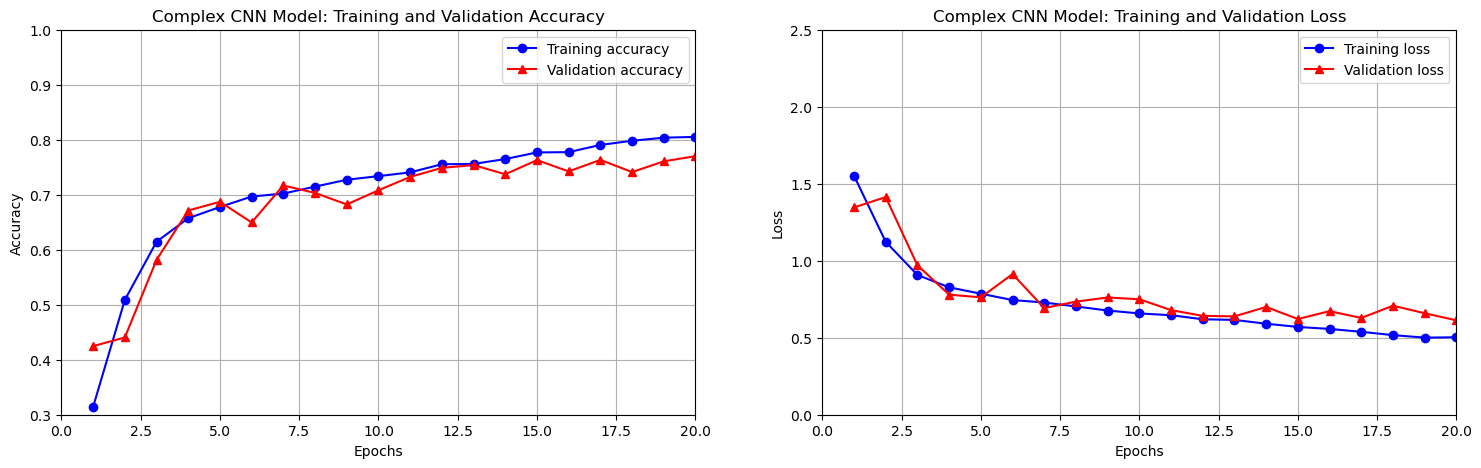

In [12]:
# Load the training history
with open('complex_cnn.pkl', 'rb') as file:
    model_history = pickle.load(file)

# Plot the training history using the loaded history
def plot_training_history(history, y_lim_acc, y_lim_loss, x_lim):
    acc = history['accuracy']
    val_acc = history['val_accuracy']
    loss = history['loss']
    val_loss = history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(18, 5))

    # Plot training and validation accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo-', label='Training accuracy')
    plt.plot(epochs, val_acc, 'r^-', label='Validation accuracy')
    plt.title('Complex CNN Model: Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.ylim(y_lim_acc)  # Set y-axis limits for accuracy
    plt.xlim(x_lim)  # Set x-axis limits
    plt.legend()
    plt.grid(True)

    # Plot training and validation loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo-', label='Training loss')
    plt.plot(epochs, val_loss, 'r^-', label='Validation loss')
    plt.title('Complex CNN Model: Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.ylim(y_lim_loss)  # Set y-axis limits for loss
    plt.xlim(x_lim)  # Set x-axis limits
    plt.legend()
    plt.grid(True)

    plt.show()

# Use the loaded history to plot with improved visualization
plot_training_history(model_history, y_lim_acc=(0.3, 1), y_lim_loss=(0, 2.5), x_lim=(0, 20))

### Evaluating the Model on the Test Set

4/4 [==============================] - 1s 76ms/step - loss: 0.5049 - accuracy: 0.8125
Test Loss: 0.5049043893814087
Test Accuracy: 0.8125
4/4 [==============================] - 1s 75ms/step
Complex CNN Model: Classification Report
              precision    recall  f1-score   support

       happy       0.88      0.88      0.88        32
     neutral       0.69      0.78      0.74        32
         sad       0.75      0.75      0.75        32
    surprise       0.96      0.84      0.90        32

    accuracy                           0.81       128
   macro avg       0.82      0.81      0.82       128
weighted avg       0.82      0.81      0.82       128



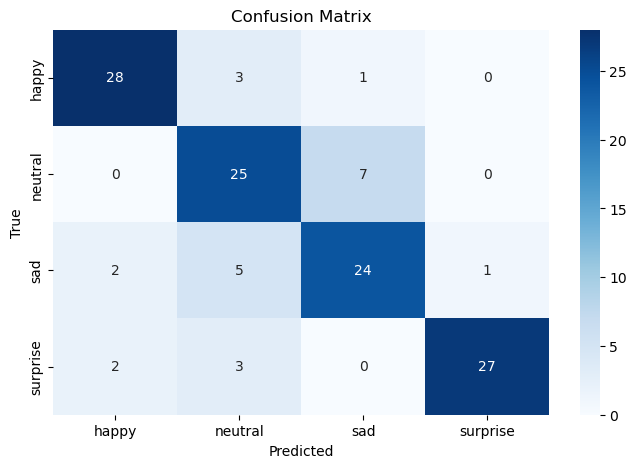

In [11]:
complex_cnn = load_model('complex_cnn.h5')

test_loss, test_accuracy = complex_cnn.evaluate(test_data_loader_rgb)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

Y_pred = complex_cnn.predict(test_data_loader_rgb)
y_pred = np.argmax(Y_pred, axis=1)

y_true = test_data_loader_rgb.classes

print('Complex CNN Model: Classification Report')
print(classification_report(y_true, y_pred, target_names=test_data_loader_rgb.class_indices.keys()))

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=test_data_loader_rgb.class_indices.keys(), yticklabels=test_data_loader_rgb.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

**Observations, Insights and Thinking:**

**Accuracy and Loss Trends:**

- The training accuracy of the complex CNN model improves steadily, reaching about 80%.
- Validation accuracy follows a similar trend, also reaching around 80%.
- Both training and validation losses decrease significantly during the initial epochs and stabilize towards the end, with the training loss slightly lower than the validation loss.

**Classification Report:**

- The overall accuracy of the model is 81%.
- The precision, recall, and F1-scores for each class are relatively high, with the 'surprise' class achieving the highest scores (Precision: 0.96, Recall: 0.84, F1-score: 0.90).
- The 'neutral' class has the lowest performance, with a recall of 0.78 and F1-score of 0.74.
- Macro average and weighted average F1-scores are both 0.82, indicating balanced performance across all classes.

**Confusion Matrix:**

- The model correctly identifies the majority of samples for each class.
- Misclassifications are present but not excessively high. For instance, some 'neutral' samples are misclassified as 'sad' and 'happy' samples.
- The 'surprise' and 'happy' classes have the fewest misclassifications, while 'neutral' and 'sad' show more confusion between them

----------

**Insights**

**Model Performance:**
- The complex CNN model shows significant improvement over the previously tested models (VGG 16, ResNet V2, and EfficientNet) with an overall accuracy of 81%.
- High precision and recall for the 'surprise' class indicate that the model is particularly good at identifying 'surprise' expressions.

**Class Distribution and Balance:**
- The balanced precision and recall across most classes suggest that the model does not heavily favor one class over others, leading to a well-balanced performance.
- The lower performance on the 'neutral' class might indicate that these expressions are more difficult to distinguish or are underrepresented in the training data.

**Training Dynamics:**
- The convergence of training and validation accuracy and loss indicates good generalization with minimal overfitting, suggesting that the model is well-tuned for the given dataset.

**Conclusion:**

The complex CNN model demonstrates a marked improvement in performance over previous models, achieving an accuracy of 81% with well-balanced precision and recall across all classes. This indicates that the model is effective in classifying different expressions and is suitable for practical applications. Further improvements could involve addressing the slight underperformance in the 'neutral' class and possibly increasing the dataset size or diversity to enhance the model's robustness. Overall, the complex CNN model stands out as a viable solution for the specific task at hand

## Plotting Confusion Matrix for the choosen Model

4/4 [==============================] - 1s 78ms/step - loss: 0.5049 - accuracy: 0.8125
Test Loss: 0.5049043893814087
Test Accuracy: 0.8125
4/4 [==============================] - 1s 75ms/step
Complex CNN Model: Classification Report
              precision    recall  f1-score   support

       happy       0.88      0.88      0.88        32
     neutral       0.69      0.78      0.74        32
         sad       0.75      0.75      0.75        32
    surprise       0.96      0.84      0.90        32

    accuracy                           0.81       128
   macro avg       0.82      0.81      0.82       128
weighted avg       0.82      0.81      0.82       128



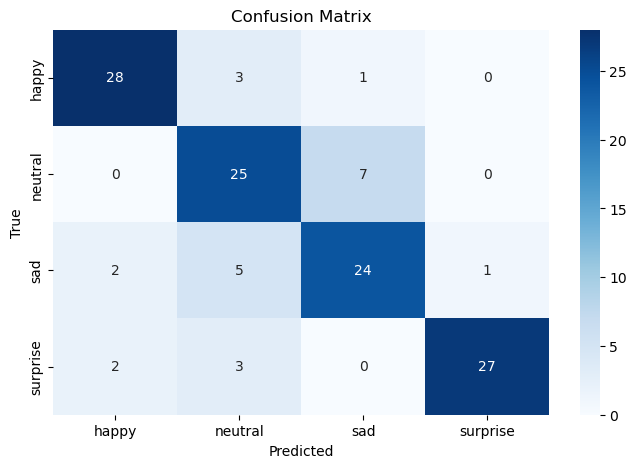

In [13]:
complex_cnn = load_model('complex_cnn.h5')

test_loss, test_accuracy = complex_cnn.evaluate(test_data_loader_rgb)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

Y_pred = complex_cnn.predict(test_data_loader_rgb)
y_pred = np.argmax(Y_pred, axis=1)

y_true = test_data_loader_rgb.classes

print('Complex CNN Model: Classification Report')
print(classification_report(y_true, y_pred, target_names=test_data_loader_rgb.class_indices.keys()))

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=test_data_loader_rgb.class_indices.keys(), yticklabels=test_data_loader_rgb.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## **Overall Conclusion**

### Insights

1. **Project Findings:**
   - **Dataset Quality and Preparation:** The quality and preparation of the dataset are crucial. Proper preprocessing, such as data augmentation and normalization, significantly impact model performance.
   - **Model Selection:** Custom models, tailored specifically to the problem, can outperform generic pre-trained models. This is evident in the superior performance of the Complex CNN model.
   - **Transfer Learning:** While transfer learning provides a good starting point, it may not always be the best solution for all tasks. This project highlighted the limitations of pre-trained models like VGG 16, ResNet V2, and EfficientNet in specific contexts.
   - **Performance Metrics:** Accuracy alone is not enough to judge a model’s performance. Precision, recall, and F1-scores provide a more detailed understanding of how well the model performs across different classes.

2. **Model Performance:**
   - The Complex CNN model achieved an accuracy of 81%, which is significantly better than the transfer learning models (VGG 16, ResNet V2, EfficientNet).
   - Validation accuracy closely follows training accuracy, indicating minimal overfitting.
   - Training and validation losses show convergence, further confirming that the model generalizes well.

3. **Class-wise Performance:**
   - The 'surprise' class showed the highest performance metrics across precision, recall, and F1-score.
   - The 'neutral' class had the lowest performance, suggesting the need for further attention.

4. **Confusion Matrix Observations:**
   - Most misclassifications occur between 'neutral' and 'sad' classes.
   - 'Happy' and 'surprise' classes are well distinguished with fewer misclassifications.

### Refined Insights

- **Most Meaningful Insights:**
  - The custom Complex CNN model outperforms the pre-trained models on this specific task.
  - Balanced class performance is achieved, with 'surprise' being the easiest to classify and 'neutral' being the hardest.
  - Effective preprocessing and data augmentation are critical for achieving high model performance.
  - Continuous monitoring and evaluation using comprehensive metrics (not just accuracy) provide a deeper understanding of model effectiveness.

### Comparison of Various Techniques and Their Relative Performance

1. **VGG 16:**
   - Accuracy: ~59%
   - Shows signs of overfitting with a significant gap between training and validation accuracy.
   - Struggles particularly with 'neutral' and 'sad' classes.

2. **ResNet V2:**
   - Accuracy: ~59%
   - Moderate overfitting.
   - Better performance than VGG 16 but still under 60%.

3. **EfficientNet:**
   - Accuracy: ~25%
   - Poor performance, does not improve significantly over epochs.
   - High training and validation losses.

4. **Complex CNN Model:**
   - Accuracy: 81%
   - Balanced training and validation accuracy with minimal overfitting.
   - Strong class-wise performance, especially for 'surprise' and 'happy'.

**Conclusion:** The Complex CNN model performs relatively better than the pre-trained models. While transfer learning models did not perform well on this specific dataset, a custom-built model designed to handle the nuances of the task showed significant improvements.

### Proposal for the Final Solution Design

**Proposed Model:** Complex CNN Model

**Reasons - Why:**
- **Performance:** It achieves the highest accuracy (81%) compared to other models.
- **Generalization:** Minimal overfitting with training and validation metrics closely aligned.
- **Balanced Class Performance:** Shows strong performance across all classes with fewer misclassifications.
- **Flexibility:** Custom model allows for further optimization and adjustments specific to the dataset.

**Final Solution Design:**
1. **Model Architecture:** Utilize the Complex CNN model architecture, fine-tuned with hyperparameters optimized for the dataset.
2. **Training Strategy:** Implement early stopping and regularization techniques to prevent overfitting.
3. **Data Augmentation:** Use data augmentation to enhance the diversity of the training dataset.
4. **Evaluation:** Continuously monitor model performance using a validation set and adjust as necessary.

By adopting the Complex CNN model, the solution leverages a custom architecture tailored to the specific characteristics of the facial emotion recognition task, ensuring robust performance and reliability.

**Some last words**:<br>
We gained some very intersting insights on this task using different approaches and models. Overall I have to say that there is some room to grow for our performance. But therefore we need to find and set optimal hyperparameters mayeby by using bayesian optimization. We could also improve our dataset by finding more images for the sad and neutral classes or perform specific data augmentation on this classes to generate more unique features. There are a lot of possibilities.

Overall it was a exciting task and I am happy to learned so much from you guys which enabled me to find adequate solutions fo such a future topic. 